In [2]:
import csv
import os
import numpy as np
import pickle

samples = {}
final_times_arr = {}
separation_dists = {}
planned_times = {}
planned_time_errors_arr = {}
planned_time_error_pcts_arr = {}

for subdir, dirs, filenames in os.walk(os. getcwd()):
    filenames.sort()
    for filename in filenames:
        if filename.endswith('.csv') and (not 'solver_perf' in filename) and (not '_plan_' in filename):
            test = os.path.split(subdir)[-1] + '_'+filename[:-4]
            with open(os.path.join(subdir,filename)) as csv_file:
                csv_reader = csv.reader(csv_file, delimiter=',')
                line_count = 0
                prev_time = 0
                sample = np.empty((0,275))
                final_times = np.empty((0))
                planned_time = np.empty((0))
                planned_time_errors = np.empty((0))
                planned_time_error_pcts = np.empty((0))
                int_d_dts = np.empty((0))
                int_d_dt = 0
                for row in csv_reader:
    #                 print('{}, {}'.format(test,row[0]))
                    if row[0]=='t':
                        continue
                    if float(row[0])<prev_time:
    #                     print(samples)
                        samples.setdefault(test, []).append(sample)
                        final_times = np.append(final_times,[sample[-1,0]])
#                         print(sample[0,272])
                        planned_time = np.append(planned_time,sample[0,272])
                        planned_time_errors = np.append(planned_time_errors,final_times[-1]-sample[0,272])
                        planned_time_error_pcts = np.append(planned_time_error_pcts,planned_time_errors[-1]/planned_time[-1]*100)
                        tmp_samples = sample[sample[:,271]!=0,273]
                        int_d_dts = np.append(int_d_dts,np.sum(tmp_samples)/tmp_samples.shape[0])
                        sample = np.empty((0,275))
#                         int_d_dts = np.append(int_d_dts,[int_d_dt/final_times[-1]])
                        int_d_dt = 0
                        prev_time = 0
                    row = ['0.0' if x==' ' else x for x in row]
                    try:
                        sample = np.append(sample,np.asarray(row).astype(float).reshape((1,275)),axis=0)
#                         if sample[-1,274]<0.5:
                        int_d_dt += sample[-1,273]*(float(row[0])-prev_time)
                        if ((float(row[0])-prev_time)<0) or (sample[-1,273]<0):
                            print('{},{},{}'.format(row[0],prev_time,sample[-1,273]))
                    except:
                        print('{} error:{}'.format(test,row))
                        pass
                    prev_time = float(row[0])
                samples.setdefault(test, []).append(sample)
                try:
                    final_times = np.append(final_times,[sample[-1,0]])
                    planned_time = np.append(planned_time,sample[0,272])
                    planned_time_errors = np.append(planned_time_errors,final_times[-1]-sample[0,272])
                    planned_time_error_pcts = np.append(planned_time_error_pcts,planned_time_errors[-1]/planned_time[-1]*100)
                    final_times_arr[test] = final_times
                    separation_dists[test] = int_d_dts
                    planned_times[test] = planned_time
                    planned_time_errors_arr[test] = planned_time_errors
                    planned_time_error_pcts_arr[test] = planned_time_error_pcts
                    print('{}:{} samples, \n\tavg final time:{:.3f} ({:.5f}),\n\tint_dist {:.3f} ({:.5f}), \n\tplan time {:.3f} ({:.5f}), \n\tpt error {:.3f} ({:.5f}), \n\tpt error % {:.3f} ({:.5f})'.format(test,len(samples[test]),np.mean(final_times),np.std(final_times),np.mean(int_d_dts),np.std(int_d_dts),np.mean(planned_time),np.std(planned_time),np.mean(planned_time_errors),np.std(planned_time_errors),np.mean(planned_time_error_pcts),np.std(planned_time_error_pcts)))
                except:
                    print('test {} failed'.format(test))
with open('final_times.pkl', 'wb') as f:
    pickle.dump(final_times_arr, f)
with open('separation_dists.pkl', 'wb') as f:
    pickle.dump(separation_dists, f)
with open('planned_times.pkl', 'wb') as f:
    pickle.dump(planned_times, f)
with open('planned_time_errors.pkl', 'wb') as f:
    pickle.dump(planned_time_errors_arr, f)
with open('planned_time_error_pcts.pkl', 'wb') as f:
    pickle.dump(planned_time_error_pcts_arr, f)

edo_avoid2_gator_chomp_live:10 samples, 
	avg final time:19.130 (2.17500),
	int_dist 0.208 (0.03083), 
	plan time 9.473 (1.97879), 
	pt error 9.657 (2.64266), 
	pt error % 113.050 (61.91348)
edo_avoid2_gator_chomp_sim:10 samples, 
	avg final time:14.273 (2.82179),
	int_dist 0.326 (0.02201), 
	plan time 5.653 (0.40798), 
	pt error 8.621 (2.88384), 
	pt error % 154.025 (55.91319)
edo_avoid2_task1_live:10 samples, 
	avg final time:18.472 (2.47188),
	int_dist 0.226 (0.02673), 
	plan time 16.661 (2.80529), 
	pt error 1.811 (2.13991), 
	pt error % 12.435 (16.38717)
edo_avoid2_task1_sim:10 samples, 
	avg final time:21.215 (3.21806),
	int_dist 0.225 (0.01645), 
	plan time 14.241 (1.86065), 
	pt error 6.975 (2.62261), 
	pt error % 49.790 (20.98620)
edo_avoid2_task3_live:10 samples, 
	avg final time:20.835 (4.99647),
	int_dist 0.275 (0.03800), 
	plan time 14.823 (2.97022), 
	pt error 6.012 (4.27510), 
	pt error % 42.954 (32.31351)
edo_avoid2_task3_sim:10 samples, 
	avg final time:21.510 (1.87545

edo_avoid_task3_live:12 samples, 
	avg final time:14.557 (3.72417),
	int_dist 0.273 (0.04278), 
	plan time 10.908 (0.62534), 
	pt error 3.649 (3.62398), 
	pt error % 33.458 (33.96104)
edo_avoid_task3_sim:11 samples, 
	avg final time:16.309 (4.09244),
	int_dist 0.271 (0.05449), 
	plan time 10.586 (0.77787), 
	pt error 5.724 (4.25841), 
	pt error % 55.244 (42.32629)
edo_birrt_gator_chomp_1_sim:10 samples, 
	avg final time:22.352 (0.01740),
	int_dist 0.209 (0.00076), 
	plan time 5.217 (0.00010), 
	pt error 17.135 (0.01735), 
	pt error % 328.481 (0.32953)
edo_birrt_gator_chomp_live:10 samples, 
	avg final time:26.702 (0.63179),
	int_dist 0.076 (0.00670), 
	plan time 5.216 (0.00009), 
	pt error 21.485 (0.63180), 
	pt error % 411.874 (12.11296)


C:\Users\jared\anaconda3\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_16884\1375013944.py:51: RuntimeWarning: overflow encountered in double_scalars
  int_d_dt += sample[-1,273]*(float(row[0])-prev_time)


edo_birrt_gator_chomp_sim:10 samples, 
	avg final time:22.177 (0.02604),
	int_dist 0.198 (0.00077), 
	plan time 0.000 (0.00000), 
	pt error 22.177 (0.02604), 
	pt error % 66904789918755100635506194250652046442758435867908171302772928550185453180755980858898149154101450273335916050156374508100716204765219766135737925423521853307745150421319024640.000 (inf)


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_16884\1375013944.py:63: RuntimeWarning: divide by zero encountered in double_scalars
  planned_time_error_pcts = np.append(planned_time_error_pcts,planned_time_errors[-1]/planned_time[-1]*100)
C:\Users\jared\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\jared\anaconda3\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\jared\anaconda3\lib\site-packages\numpy\core\_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\jared\anaconda3\lib\site-packages\numpy\core\_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
C:\Users\jared\anaconda3\lib\site-packag

edo_birrt_gator_chomp_sim_dont_use:1 samples, 
	avg final time:70.183 (0.00000),
	int_dist nan (nan), 
	plan time 0.000 (0.00000), 
	pt error 70.183 (0.00000), 
	pt error % inf (nan)
edo_birrt_replan_gator_chomp_live:10 samples, 
	avg final time:28.395 (3.02190),
	int_dist 0.176 (0.03431), 
	plan time 5.216 (0.00007), 
	pt error 23.179 (3.02191), 
	pt error % 444.334 (57.93055)
edo_birrt_replan_gator_chomp_sim:10 samples, 
	avg final time:21.330 (2.00161),
	int_dist 0.300 (0.03614), 
	plan time 5.216 (0.00008), 
	pt error 16.114 (2.00159), 
	pt error % 308.897 (38.36859)
edo_birrt_replan_gator_chomp_sim_dont_use:1 samples, 
	avg final time:70.183 (0.00000),
	int_dist nan (nan), 
	plan time 0.000 (0.00000), 
	pt error 70.183 (0.00000), 
	pt error % inf (nan)
edo_birrt_replan_task1_1_sim:10 samples, 
	avg final time:27.525 (1.33064),
	int_dist 0.098 (0.01256), 
	plan time 5.524 (0.22472), 
	pt error 22.001 (1.41909), 
	pt error % 399.374 (35.96082)
edo_birrt_replan_task1_live:11 samples,

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_16884\1375013944.py:63: RuntimeWarning: overflow encountered in double_scalars
  planned_time_error_pcts = np.append(planned_time_error_pcts,planned_time_errors[-1]/planned_time[-1]*100)


edo_birrt_replan_task1_sim:1 samples, 
	avg final time:28.750 (0.00000),
	int_dist nan (nan), 
	plan time 0.000 (0.00000), 
	pt error 28.750 (0.00000), 
	pt error % inf (nan)
edo_birrt_replan_task1_sim_dont_use:1 samples, 
	avg final time:70.217 (0.00000),
	int_dist nan (nan), 
	plan time 0.000 (0.00000), 
	pt error 70.217 (0.00000), 
	pt error % inf (nan)
edo_birrt_replan_task3_1_sim:10 samples, 
	avg final time:26.415 (3.09456),
	int_dist 0.205 (0.01949), 
	plan time 5.090 (0.23828), 
	pt error 21.326 (3.12312), 
	pt error % 420.330 (66.78075)


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_16884\1375013944.py:40: RuntimeWarning: divide by zero encountered in double_scalars
  planned_time_error_pcts = np.append(planned_time_error_pcts,planned_time_errors[-1]/planned_time[-1]*100)


edo_birrt_replan_task3_live error:['27.1167', '100', '2.32051', '1.49846', '1.09819', '0.000841057', '-0.854105', '0.00210264', '0', '0', '0', '0', '0', '0', '0', '2.48731', '2.48731', '-3.08908', '-3.08908', '-9.26723', '-0.0375305', '-0.483348', '-0.0462291', '0.218953', '0.227585', '0.15369', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_16884\1375013944.py:40: RuntimeWarning: overflow encountered in double_scalars
  planned_time_error_pcts = np.append(planned_time_error_pcts,planned_time_errors[-1]/planned_time[-1]*100)


edo_birrt_replan_task3_sim:20 samples, 
	avg final time:25.726 (2.43331),
	int_dist 0.208 (0.01987), 
	plan time 2.545 (2.55033), 
	pt error 23.181 (2.99634), 
	pt error % inf (nan)
edo_birrt_replan_task3_sim_dont_use:1 samples, 
	avg final time:70.200 (0.00000),
	int_dist nan (nan), 
	plan time 0.000 (0.00000), 
	pt error 70.200 (0.00000), 
	pt error % inf (nan)
edo_birrt_task1_1_sim:10 samples, 
	avg final time:24.878 (0.33408),
	int_dist 0.060 (0.00944), 
	plan time 5.607 (0.43595), 
	pt error 19.271 (0.66313), 
	pt error % 346.242 (33.10771)
edo_birrt_task1_live:10 samples, 
	avg final time:27.898 (2.94933),
	int_dist 0.065 (0.02410), 
	plan time 5.582 (0.22436), 
	pt error 22.316 (2.98445), 
	pt error % 400.851 (58.23067)
edo_birrt_task1_sim:10 samples, 
	avg final time:24.798 (0.35468),
	int_dist 0.057 (0.01290), 
	plan time 0.000 (0.00000), 
	pt error 24.798 (0.35468), 
	pt error % inf (nan)


C:\Users\jared\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


edo_birrt_task1_sim_dont_use:3 samples, 
	avg final time:27.422 (30.28303),
	int_dist inf (nan), 
	plan time 0.000 (0.00000), 
	pt error 27.422 (30.28303), 
	pt error % inf (nan)
edo_birrt_task3_1_sim:10 samples, 
	avg final time:22.335 (0.27040),
	int_dist 0.142 (0.00225), 
	plan time 5.016 (0.19225), 
	pt error 17.319 (0.23587), 
	pt error % 345.840 (15.29975)
edo_birrt_task3_live error:['23.3167', '93', '2.31938', '1.49984', '1.0986t', 'spd scale', 'edo_joint_1 pos', 'edo_joint_2 pos', 'edo_joint_3 pos', 'edo_joint_4 pos', 'edo_joint_5 pos', 'edo_joint_6 pos', 'edo_joint_1 vel', 'edo_joint_2 vel', 'edo_joint_3 vel', 'edo_joint_4 vel', 'edo_joint_5 vel', 'edo_joint_6 vel', 'edo_joint_1 acc', 'edo_joint_2 acc', 'edo_joint_3 acc', 'edo_joint_4 acc', 'edo_joint_5 acc', 'edo_joint_6 acc', 'edo_joint_1 effort', 'edo_joint_2 effort', 'edo_joint_3 effort', 'edo_joint_4 effort', 'edo_joint_5 effort', 'edo_joint_6 effort', 'act human j0 x', ' y', ' z', 'act human j1 x', ' y', ' z', 'act human

edo_dirrt_task3_sim:12 samples, 
	avg final time:34.114 (0.11605),
	int_dist 0.177 (0.00967), 
	plan time 2.995 (0.02050), 
	pt error 31.119 (0.11059), 
	pt error % 1038.992 (7.40166)
edo_prob_hamp_gator_chomp_live:5 samples, 
	avg final time:27.233 (1.15484),
	int_dist 0.085 (0.00639), 
	plan time 0.000 (0.00000), 
	pt error 27.233 (1.15484), 
	pt error % inf (nan)
edo_prob_hamp_gator_chomp_sim:10 samples, 
	avg final time:21.945 (0.01066),
	int_dist 0.206 (0.00051), 
	plan time 4.507 (0.00000), 
	pt error 17.439 (0.01066), 
	pt error % 386.964 (0.23659)
edo_prob_hamp_task1_live error:['27.4001', '100', '0.000540554', '0.872038', '0.999479', '0.000456259', '-0.30014', '-0.000231153', '0', '0', '0', '0', '0', '0', '0', '0', '0', '-3.10268', '0', '0', '-0.0267572', '-0.373457', '-0.685387', '0.15345', '0.0876249', '0.0155461', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1

edo_stomp_task3_live:10 samples, 
	avg final time:24.443 (0.51792),
	int_dist 0.122 (0.01698), 
	plan time 3.475 (3.47577), 
	pt error 20.968 (3.59513), 
	pt error % inf (nan)
edo_stomp_task3_sim:10 samples, 
	avg final time:22.152 (0.23388),
	int_dist 0.180 (0.00277), 
	plan time 6.880 (0.17638), 
	pt error 15.271 (0.19244), 
	pt error % 222.114 (6.89905)
old_dirrt_gator_chomp_live:11 samples, 
	avg final time:25.252 (2.53070),
	int_dist 0.140 (0.01568), 
	plan time 3.312 (0.01228), 
	pt error 21.940 (2.52863), 
	pt error % 662.401 (75.90675)
old_dirrt_gator_chomp_sim:10 samples, 
	avg final time:29.500 (0.06325),
	int_dist 0.208 (0.00663), 
	plan time 3.302 (0.02935), 
	pt error 26.198 (0.06232), 
	pt error % 793.393 (7.83485)
old_dirrt_task1_live:10 samples, 
	avg final time:18.795 (4.76087),
	int_dist 0.141 (0.03797), 
	plan time 4.904 (0.27165), 
	pt error 13.891 (4.50811), 
	pt error % 279.818 (70.88328)
old_dirrt_task1_sim:12 samples, 
	avg final time:16.458 (0.11797),
	int_dist

sharework_avoid2_task3_sim:10 samples, 
	avg final time:13.953 (2.92749),
	int_dist 0.369 (0.03923), 
	plan time 9.052 (0.88599), 
	pt error 4.901 (2.56974), 
	pt error % 54.019 (25.68053)
sharework_avoid_gator_chomp_live:10 samples, 
	avg final time:23.673 (3.07244),
	int_dist 0.421 (0.11514), 
	plan time 0.000 (0.00000), 
	pt error 23.673 (3.07244), 
	pt error % inf (nan)
sharework_avoid_gator_chomp_sim error:['5.9334', '38', '0.697292', '-1.30782', '1.37868', '-1.64084', '1.57125', '0.867907', '0.0247356', '-0.0260818', '-0.0291989', '0.0535358', '-0.0635007', '0.219021', '-12.9514', '13.6545', '15.2887', '-28.0015', '33.2407', '-114.628', '0', '0', '0', '0', '0', '0', '0.792542', '0.0323391', '0.999666', '0.898039', '-0.0899645', '1.54526', '0.797091', '0.00167146', '1.68328', '0.898458', '0.0725079', '1.56759', '0.720046', '0.157436', '1.77297', '0.464788', '-0.139575', '2.08382', '0.897621', '-0.252437t', 'spd scale', 'shoulder_pan_joint pos', 'shoulder_lift_joint pos', 'elbow_jo

sharework_avoid_task1_sim:14 samples, 
	avg final time:8.736 (3.73216),
	int_dist 0.379 (0.06607), 
	plan time 9.282 (4.35477), 
	pt error -0.547 (1.71327), 
	pt error % -4.822 (16.78226)
sharework_avoid_task3_live:10 samples, 
	avg final time:25.190 (3.17160),
	int_dist 0.372 (0.08533), 
	plan time 0.000 (0.00000), 
	pt error 25.190 (3.17160), 
	pt error % inf (nan)
sharework_avoid_task3_sim error:['11.7168', '68', '0.449329', '-1.12021', '1.15991', '-1.58149', '1.55384', '1.09035', '0.13694', '0.122134t', 'spd scale', 'shoulder_pan_joint pos', 'shoulder_lift_joint pos', 'elbow_joint pos', 'wrist_1_joint pos', 'wrist_2_joint pos', 'wrist_3_joint pos', 'shoulder_pan_joint vel', 'shoulder_lift_joint vel', 'elbow_joint vel', 'wrist_1_joint vel', 'wrist_2_joint vel', 'wrist_3_joint vel', 'shoulder_pan_joint acc', 'shoulder_lift_joint acc', 'elbow_joint acc', 'wrist_1_joint acc', 'wrist_2_joint acc', 'wrist_3_joint acc', 'shoulder_pan_joint effort', 'shoulder_lift_joint effort', 'elbow_joi

sharework_birrt_task1_1_sim:10 samples, 
	avg final time:20.940 (0.38950),
	int_dist 0.201 (0.06393), 
	plan time 1.574 (0.33332), 
	pt error 19.366 (0.22544), 
	pt error % 1280.836 (243.84328)
sharework_birrt_task1_live:10 samples, 
	avg final time:25.218 (1.67171),
	int_dist 0.365 (0.04996), 
	plan time 0.000 (0.00000), 
	pt error 25.218 (1.67171), 
	pt error % inf (nan)
sharework_birrt_task1_sim:10 samples, 
	avg final time:20.955 (0.44477),
	int_dist 0.170 (0.04559), 
	plan time 0.000 (0.00000), 
	pt error 20.955 (0.44477), 
	pt error % inf (nan)
sharework_birrt_task3_1_sim:10 samples, 
	avg final time:21.045 (0.00761),
	int_dist 0.114 (0.00138), 
	plan time 1.016 (0.00002), 
	pt error 20.029 (0.00760), 
	pt error % 1970.652 (0.72838)
sharework_birrt_task3_live:10 samples, 
	avg final time:24.907 (0.33110),
	int_dist 0.307 (0.00976), 
	plan time 0.000 (0.00000), 
	pt error 24.907 (0.33110), 
	pt error % inf (nan)
sharework_birrt_task3_sim:10 samples, 
	avg final time:21.048 (0.0089

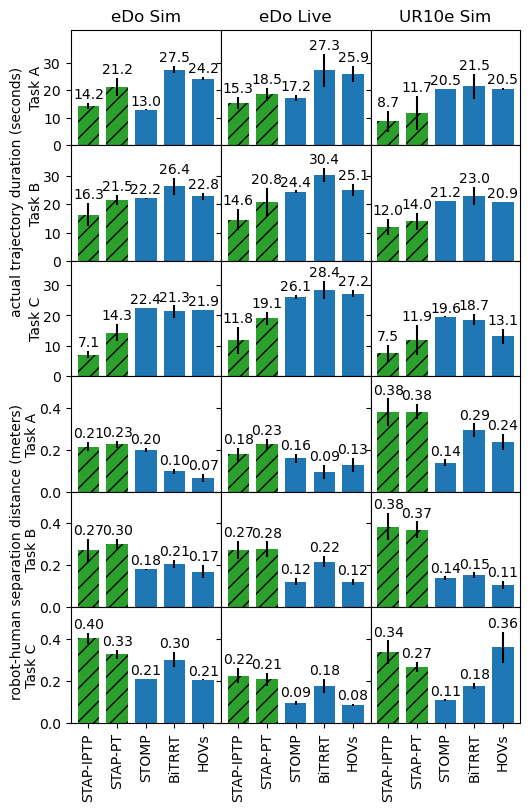

In [16]:
import matplotlib.pyplot as plt
edo_task1_sim_plot_tests = ['edo_avoid_task1_sim','edo_avoid2_task1_sim','edo_stomp_task1_sim','edo_birrt_replan_task1_1_sim','edo_prob_hamp_task1_sim']
edo_task3_sim_plot_tests = ['edo_avoid_task3_sim','edo_avoid2_task3_sim','edo_stomp_task3_sim','edo_birrt_replan_task3_1_sim','edo_prob_hamp_task3_sim']
edo_gator_sim_plot_tests = ['edo_avoid_gator_chomp_sim','edo_avoid2_gator_chomp_sim','edo_stomp_gator_chomp_sim','edo_birrt_replan_gator_chomp_sim','edo_prob_hamp_gator_chomp_sim']
    
edo_task3_live_plot_tests = ['edo_avoid_task3_live','edo_avoid2_task3_live','edo_stomp_task3_live','edo_birrt_replan_task3_live','edo_prob_hamp_task3_live']
edo_task1_live_plot_tests = ['edo_avoid_task1_live','edo_avoid2_task1_live','edo_stomp_task1_live','edo_birrt_replan_task1_live','edo_prob_hamp_task1_live']
edo_gator_live_plot_tests = ['edo_avoid_gator_chomp_live','edo_avoid2_gator_chomp_live','edo_stomp_gator_chomp_live','edo_birrt_replan_gator_chomp_live','edo_prob_hamp_gator_chomp_live']

sharework_task1_sim_plot_tests = ['sharework_avoid_task1_sim','sharework_avoid2_task1_sim','sharework_stomp_task1_sim','sharework_birrt_replan_task1_1_sim','sharework_prob_hamp_task1_sim']
sharework_task3_sim_plot_tests = ['sharework_avoid_task3_sim','sharework_avoid2_task3_sim','sharework_stomp_task3_sim','sharework_birrt_replan_task3_1_sim','sharework_prob_hamp_task3_sim']
sharework_gator_sim_plot_tests = ['sharework_avoid_gator_chomp_sim','sharework_avoid2_gator_chomp_sim','sharework_stomp_gator_chomp_sim','sharework_birrt_replan_gator_chomp_1_sim','sharework_prob_hamp_gator_chomp_sim']


fig1, ax= plt.subplots(6,3,sharey='row',sharex=True,figsize=(5.8, 9))
# ax1.set_title('Trajectory Durations')
plot_data = []
means = []
std_devs = []
for i in range(5):
    test = edo_task1_sim_plot_tests[i]
    plot_data.append(final_times_arr[test])
    means.append(np.mean(final_times_arr[test]))
    std_devs.append(np.std(final_times_arr[test]))
# ax1.boxplot(plot_data,showfliers=False,
#             positions=np.array(np.arange(5))*0.5,
#             widths=0.3,
#             boxprops=dict(linewidth=3))
whiskerprops = dict(linestyle='-',linewidth=1.4, color='black')
boxprops = dict(linewidth=1.4)
meanlineprops = dict(marker='D', markeredgecolor='black',
                      markerfacecolor='firebrick')
medianprops = dict(linestyle='-', linewidth=2.0, color='tab:blue')
width = 1.5
colors = ['tab:green','tab:green','tab:blue','tab:blue','tab:blue']
hatch = [ "//" , "//" , "","",""]
rects0 = ax[0,0].bar(np.arange(5)+1,means,width/2,yerr=std_devs,color=colors,hatch=hatch)
ax[0,0].bar_label(rects0, padding=1,fmt='%.1f',fontsize=10)

# pos = np.arange(5) + 1
# heights = [0.4,0.65,0.7,0.5,0.7]
# for tick in range(5):
#     ax[0,0].text(pos[tick], heights[tick], '{:.1f}'.format(means[tick]),
#              transform=ax[0,0].get_xaxis_transform(),
#              horizontalalignment='center')
plot_data = []
means = []
std_devs = []
for i in range(5):
    test = edo_task1_live_plot_tests[i]
    plot_data.append(final_times_arr[test])
    means.append(np.mean(final_times_arr[test]))
    std_devs.append(np.std(final_times_arr[test]))

rects1 = ax[0,1].bar(np.arange(5)+1,means,width/2,yerr=std_devs,color=colors,hatch=hatch)
ax[0,1].bar_label(rects1, padding=1,fmt='%.1f',fontsize=10)

plot_data = []
means = []
std_devs = []
for i in range(5):
    test = sharework_task1_sim_plot_tests[i]
    plot_data.append(final_times_arr[test])
    means.append(np.mean(final_times_arr[test]))
    std_devs.append(np.std(final_times_arr[test]))

rects2 = ax[0,2].bar(np.arange(5)+1,means,width/2,yerr=std_devs,color=colors,hatch=hatch)
ax[0,2].bar_label(rects2, padding=1,fmt='%.1f',fontsize=10)

ax[0,0].set_ylabel('Task A', labelpad=0)
plot_data = []
means = []
std_devs = []
for i in range(5):
    test = edo_task3_sim_plot_tests[i]
    plot_data.append(final_times_arr[test])
    means.append(np.mean(final_times_arr[test]))
    std_devs.append(np.std(final_times_arr[test]))

rects3 = ax[1,0].bar(np.arange(5)+1,means,width/2,yerr=std_devs,color=colors,hatch=hatch)
ax[1,0].bar_label(rects3, padding=1,fmt='%.1f',fontsize=10)
    
plot_data = []
means = []
std_devs = []
for i in range(5):
    test = edo_task3_live_plot_tests[i]
    plot_data.append(final_times_arr[test])
    means.append(np.mean(final_times_arr[test]))
    std_devs.append(np.std(final_times_arr[test]))

rects4 = ax[1,1].bar(np.arange(5)+1,means,width/2,yerr=std_devs,color=colors,hatch=hatch)
ax[1,1].bar_label(rects4, padding=1,fmt='%.1f',fontsize=10)
    
plot_data = []
means = []
std_devs = []
for i in range(5):
    test = sharework_task3_sim_plot_tests[i]
    plot_data.append(final_times_arr[test])
    means.append(np.mean(final_times_arr[test]))
    std_devs.append(np.std(final_times_arr[test]))

rects5 = ax[1,2].bar(np.arange(5)+1,means,width/2,yerr=std_devs,color=colors,hatch=hatch)
ax[1,2].bar_label(rects5, padding=1,fmt='%.1f',fontsize=10)
    
ax[1,0].set_ylabel('Task B', labelpad=0)    
# pos = np.arange(5) + 1
# heights = [0.25,0.72,0.75,0.65,0.75]
# for tick, label in zip(range(5), ax2.get_xticklabels()):
#     k = tick % 2
#     ax2.text(pos[tick], heights[tick], '{:.1f}'.format(means[tick]),
#              transform=ax2.get_xaxis_transform(),
#              horizontalalignment='center', size='x-small')


plot_data = []
means = []
std_devs = []
for i in range(5):
    test = edo_gator_sim_plot_tests[i]
    plot_data.append(final_times_arr[test])
    means.append(np.mean(final_times_arr[test]))
    std_devs.append(np.std(final_times_arr[test]))

rects6 = ax[2,0].bar(np.arange(5)+1,means,width/2,yerr=std_devs,color=colors,hatch=hatch)
ax[2,0].bar_label(rects6, padding=1,fmt='%.1f',fontsize=10)
    
plot_data = []
means = []
std_devs = []
for i in range(5):
    test = edo_gator_live_plot_tests[i]
    plot_data.append(final_times_arr[test])
    means.append(np.mean(final_times_arr[test]))
    std_devs.append(np.std(final_times_arr[test]))

rects7 = ax[2,1].bar(np.arange(5)+1,means,width/2,yerr=std_devs,color=colors,hatch=hatch)
ax[2,1].bar_label(rects7, padding=1,fmt='%.1f',fontsize=10)
    
plot_data = []
means = []
std_devs = []
for i in range(5):
    test = sharework_gator_sim_plot_tests[i]
    plot_data.append(final_times_arr[test])
    means.append(np.mean(final_times_arr[test]))
    std_devs.append(np.std(final_times_arr[test]))

rects8 = ax[2,2].bar(np.arange(5)+1,means,width/2,yerr=std_devs,color=colors,hatch=hatch)
ax[2,2].bar_label(rects8, padding=1,fmt='%.1f',fontsize=10)
    
ax[2,0].set_ylabel('Task C', labelpad=0) 
ax[0,0].set_yticks([0,10,20,30])
ax[1,0].set_yticks([0,10,20,30])
ax[2,0].set_yticks([0,10,20,30])


fig1.text(0.02, 0.7, 'actual trajectory duration (seconds)', va='center', rotation='vertical')
ax[0,0].set_title('eDo Sim',fontsize=12)
ax[0,1].set_title('eDo Live',fontsize=12)
ax[0,2].set_title('UR10e Sim',fontsize=12)
ax[0,0].set_ylim([0,42])
ax[1,0].set_ylim([0,41])
ax[2,0].set_ylim([0,38])
            
    
plot_data = []
means = []
std_devs = []
for i in range(5):
    test = edo_task1_sim_plot_tests[i]
    plot_data.append(separation_dists[test])
    means.append(np.mean(separation_dists[test]))
    std_devs.append(np.std(separation_dists[test]))

width = 1.5
colors = ['tab:green','tab:green','tab:blue','tab:blue','tab:blue']
rects0 = ax[3,0].bar(np.arange(5)+1,means,width/2,yerr=std_devs,color=colors,hatch=hatch)
ax[3,0].bar_label(rects0, padding=1,fmt='%.2f',fontsize=10)

# pos = np.arange(5) + 1
# heights = [0.4,0.65,0.7,0.5,0.7]
# for tick in range(5):
#     ax[0,0].text(pos[tick], heights[tick], '{:.1f}'.format(means[tick]),
#              transform=ax[0,0].get_xaxis_transform(),
#              horizontalalignment='center')
plot_data = []
means = []
std_devs = []
for i in range(5):
    test = edo_task1_live_plot_tests[i]
    plot_data.append(separation_dists[test])
    means.append(np.mean(separation_dists[test]))
    std_devs.append(np.std(separation_dists[test]))

rects1 = ax[3,1].bar(np.arange(5)+1,means,width/2,yerr=std_devs,color=colors,hatch=hatch)
ax[3,1].bar_label(rects1, padding=1,fmt='%.2f',fontsize=10)

plot_data = []
means = []
std_devs = []
for i in range(5):
    test = sharework_task1_sim_plot_tests[i]
    plot_data.append(separation_dists[test])
    means.append(np.mean(separation_dists[test]))
    std_devs.append(np.std(separation_dists[test]))

rects2 = ax[3,2].bar(np.arange(5)+1,means,width/2,yerr=std_devs,color=colors,hatch=hatch)
ax[3,2].bar_label(rects2, padding=1,fmt='%.2f',fontsize=10)

ax[3,0].set_ylabel('Task A', labelpad=0)
plot_data = []
means = []
std_devs = []
for i in range(5):
    test = edo_task3_sim_plot_tests[i]
    plot_data.append(separation_dists[test])
    means.append(np.mean(separation_dists[test]))
    std_devs.append(np.std(separation_dists[test]))

rects3 = ax[4,0].bar(np.arange(5)+1,means,width/2,yerr=std_devs,color=colors,hatch=hatch)
ax[4,0].bar_label(rects3, padding=1,fmt='%.2f',fontsize=10)
    
plot_data = []
means = []
std_devs = []
for i in range(5):
    test = edo_task3_live_plot_tests[i]
    plot_data.append(separation_dists[test])
    means.append(np.mean(separation_dists[test]))
    std_devs.append(np.std(separation_dists[test]))

rects4 = ax[4,1].bar(np.arange(5)+1,means,width/2,yerr=std_devs,color=colors,hatch=hatch)
ax[4,1].bar_label(rects4, padding=1,fmt='%.2f',fontsize=10)
    
plot_data = []
means = []
std_devs = []
for i in range(5):
    test = sharework_task3_sim_plot_tests[i]
    plot_data.append(separation_dists[test])
    means.append(np.mean(separation_dists[test]))
    std_devs.append(np.std(separation_dists[test]))

rects5 = ax[4,2].bar(np.arange(5)+1,means,width/2,yerr=std_devs,color=colors,hatch=hatch)
ax[4,2].bar_label(rects5, padding=1,fmt='%.2f',fontsize=10)
    
ax[4,0].set_ylabel('Task B', labelpad=0)    
# pos = np.arange(5) + 1
# heights = [0.25,0.72,0.75,0.65,0.75]
# for tick, label in zip(range(5), ax2.get_xticklabels()):
#     k = tick % 2
#     ax2.text(pos[tick], heights[tick], '{:.1f}'.format(means[tick]),
#              transform=ax2.get_xaxis_transform(),
#              horizontalalignment='center', size='x-small')


plot_data = []
means = []
std_devs = []
for i in range(5):
    test = edo_gator_sim_plot_tests[i]
    plot_data.append(separation_dists[test])
    means.append(np.mean(separation_dists[test]))
    std_devs.append(np.std(separation_dists[test]))

rects6 = ax[5,0].bar(np.arange(5)+1,means,width/2,yerr=std_devs,color=colors,hatch=hatch)
ax[5,0].bar_label(rects6, padding=1,fmt='%.2f',fontsize=10)
    
plot_data = []
means = []
std_devs = []
for i in range(5):
    test = edo_gator_live_plot_tests[i]
    plot_data.append(separation_dists[test])
    means.append(np.mean(separation_dists[test]))
    std_devs.append(np.std(separation_dists[test]))

rects7 = ax[5,1].bar(np.arange(5)+1,means,width/2,yerr=std_devs,color=colors,hatch=hatch)
ax[5,1].bar_label(rects7, padding=1,fmt='%.2f',fontsize=10)
    
plot_data = []
means = []
std_devs = []
for i in range(5):
    test = sharework_gator_sim_plot_tests[i]
    plot_data.append(separation_dists[test])
    means.append(np.mean(separation_dists[test]))
    std_devs.append(np.std(separation_dists[test]))

rects8 = ax[5,2].bar(np.arange(5)+1,means,width/2,yerr=std_devs,color=colors,hatch=hatch)
ax[5,2].bar_label(rects8, padding=1,fmt='%.2f',fontsize=10)
    
ax[5,0].set_ylabel('Task C', labelpad=0) 
# ax[0,0].set_yticks([0,10,20,30])
# ax[1,0].set_yticks([0,10,20,30])
# ax[2,0].set_yticks([0,10,20,30])
test_name = ['STAP-IPTP','STAP-PT','STOMP','BiTRRT','HOVs']
ax[5,0].set_xticks(range(1,6),test_name,rotation=90)
ax[5,1].set_xticks(range(1,6),test_name,rotation=90)
ax[5,2].set_xticks(range(1,6),test_name,rotation=90)

fig1.text(0.02, 0.3, 'robot-human separation distance (meters)', va='center', rotation='vertical')

ax[3,0].set_yticks([0,0.2,0.4])
ax[4,0].set_yticks([0,0.2,0.4])
ax[5,0].set_yticks([0,0.2,0.4])
ax[3,0].set_ylim([0,0.55])
ax[4,0].set_ylim([0,0.55])
ax[5,0].set_ylim([0,0.55])

# pos = np.arange(5) + 1
# heights = [0.25,0.72,0.75,0.65,0.75]
# for tick, label in zip(range(5), ax3.get_xticklabels()):
#     k = tick % 2
#     ax3.text(pos[tick], heights[tick], '{:.1f}'.format(means[tick]),
#              transform=ax3.get_xaxis_transform(),
#              horizontalalignment='center', size='x-small')
plt.subplots_adjust(wspace=0, hspace=0.0)

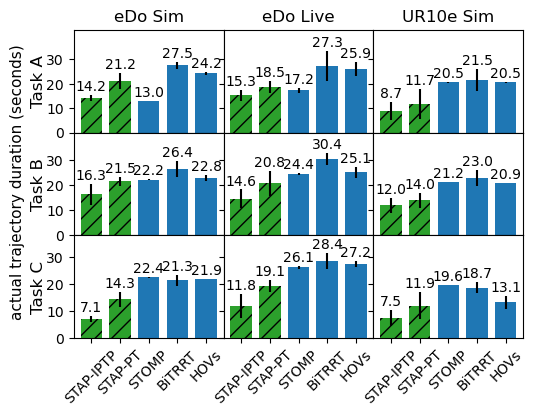

In [22]:
import matplotlib.pyplot as plt
edo_task1_sim_plot_tests = ['edo_avoid_task1_sim','edo_avoid2_task1_sim','edo_stomp_task1_sim','edo_birrt_replan_task1_1_sim','edo_prob_hamp_task1_sim']
edo_task3_sim_plot_tests = ['edo_avoid_task3_sim','edo_avoid2_task3_sim','edo_stomp_task3_sim','edo_birrt_replan_task3_1_sim','edo_prob_hamp_task3_sim']
edo_gator_sim_plot_tests = ['edo_avoid_gator_chomp_sim','edo_avoid2_gator_chomp_sim','edo_stomp_gator_chomp_sim','edo_birrt_replan_gator_chomp_sim','edo_prob_hamp_gator_chomp_sim']
    
edo_task3_live_plot_tests = ['edo_avoid_task3_live','edo_avoid2_task3_live','edo_stomp_task3_live','edo_birrt_replan_task3_live','edo_prob_hamp_task3_live']
edo_task1_live_plot_tests = ['edo_avoid_task1_live','edo_avoid2_task1_live','edo_stomp_task1_live','edo_birrt_replan_task1_live','edo_prob_hamp_task1_live']
edo_gator_live_plot_tests = ['edo_avoid_gator_chomp_live','edo_avoid2_gator_chomp_live','edo_stomp_gator_chomp_live','edo_birrt_replan_gator_chomp_live','edo_prob_hamp_gator_chomp_live']

sharework_task1_sim_plot_tests = ['sharework_avoid_task1_sim','sharework_avoid2_task1_sim','sharework_stomp_task1_sim','sharework_birrt_replan_task1_1_sim','sharework_prob_hamp_task1_sim']
sharework_task3_sim_plot_tests = ['sharework_avoid_task3_sim','sharework_avoid2_task3_sim','sharework_stomp_task3_sim','sharework_birrt_replan_task3_1_sim','sharework_prob_hamp_task3_sim']
sharework_gator_sim_plot_tests = ['sharework_avoid_gator_chomp_sim','sharework_avoid2_gator_chomp_sim','sharework_stomp_gator_chomp_sim','sharework_birrt_replan_gator_chomp_1_sim','sharework_prob_hamp_gator_chomp_sim']


fig1, ax1= plt.subplots(3,3,sharey='row',sharex=True,figsize=(5.8, 4))
plot_data = []
means = []
std_devs = []
for i in range(5):
    test = edo_task1_sim_plot_tests[i]
    plot_data.append(final_times_arr[test])
    means.append(np.mean(final_times_arr[test]))
    std_devs.append(np.std(final_times_arr[test]))
whiskerprops = dict(linestyle='-',linewidth=1.4, color='black')
boxprops = dict(linewidth=1.4)
meanlineprops = dict(marker='D', markeredgecolor='black',
                      markerfacecolor='firebrick')
medianprops = dict(linestyle='-', linewidth=2.0, color='tab:blue')
width = 1.5
colors = ['tab:green','tab:green','tab:blue','tab:blue','tab:blue']
hatch = [ "//" , "//" , "","",""]
rects0 = ax1[0,0].bar(np.arange(5)+1,means,width/2,yerr=std_devs,color=colors,hatch=hatch)
ax1[0,0].bar_label(rects0, padding=1,fmt='%.1f',fontsize=10)

plot_data = []
means = []
std_devs = []
for i in range(5):
    test = edo_task1_live_plot_tests[i]
    plot_data.append(final_times_arr[test])
    means.append(np.mean(final_times_arr[test]))
    std_devs.append(np.std(final_times_arr[test]))

rects1 = ax1[0,1].bar(np.arange(5)+1,means,width/2,yerr=std_devs,color=colors,hatch=hatch)
ax1[0,1].bar_label(rects1, padding=1,fmt='%.1f',fontsize=10)

plot_data = []
means = []
std_devs = []
for i in range(5):
    test = sharework_task1_sim_plot_tests[i]
    plot_data.append(final_times_arr[test])
    means.append(np.mean(final_times_arr[test]))
    std_devs.append(np.std(final_times_arr[test]))

rects2 = ax1[0,2].bar(np.arange(5)+1,means,width/2,yerr=std_devs,color=colors,hatch=hatch)
ax1[0,2].bar_label(rects2, padding=1,fmt='%.1f',fontsize=10)
ax1[0,0].set_ylabel('Task A', labelpad=0,fontsize=12)
plot_data = []
means = []
std_devs = []
for i in range(5):
    test = edo_task3_sim_plot_tests[i]
    plot_data.append(final_times_arr[test])
    means.append(np.mean(final_times_arr[test]))
    std_devs.append(np.std(final_times_arr[test]))

rects3 = ax1[1,0].bar(np.arange(5)+1,means,width/2,yerr=std_devs,color=colors,hatch=hatch)
ax1[1,0].bar_label(rects3, padding=1,fmt='%.1f',fontsize=10)
    
plot_data = []
means = []
std_devs = []
for i in range(5):
    test = edo_task3_live_plot_tests[i]
    plot_data.append(final_times_arr[test])
    means.append(np.mean(final_times_arr[test]))
    std_devs.append(np.std(final_times_arr[test]))

rects4 = ax1[1,1].bar(np.arange(5)+1,means,width/2,yerr=std_devs,color=colors,hatch=hatch)
ax1[1,1].bar_label(rects4, padding=1,fmt='%.1f',fontsize=10)
    
plot_data = []
means = []
std_devs = []
for i in range(5):
    test = sharework_task3_sim_plot_tests[i]
    plot_data.append(final_times_arr[test])
    means.append(np.mean(final_times_arr[test]))
    std_devs.append(np.std(final_times_arr[test]))

rects5 = ax1[1,2].bar(np.arange(5)+1,means,width/2,yerr=std_devs,color=colors,hatch=hatch)
ax1[1,2].bar_label(rects5, padding=1,fmt='%.1f',fontsize=10)
    
ax1[1,0].set_ylabel('Task B', labelpad=0,fontsize=12)    

plot_data = []
means = []
std_devs = []
for i in range(5):
    test = edo_gator_sim_plot_tests[i]
    plot_data.append(final_times_arr[test])
    means.append(np.mean(final_times_arr[test]))
    std_devs.append(np.std(final_times_arr[test]))

rects6 = ax1[2,0].bar(np.arange(5)+1,means,width/2,yerr=std_devs,color=colors,hatch=hatch)
ax1[2,0].bar_label(rects6, padding=1,fmt='%.1f',fontsize=10)
    
plot_data = []
means = []
std_devs = []
for i in range(5):
    test = edo_gator_live_plot_tests[i]
    plot_data.append(final_times_arr[test])
    means.append(np.mean(final_times_arr[test]))
    std_devs.append(np.std(final_times_arr[test]))

rects7 = ax1[2,1].bar(np.arange(5)+1,means,width/2,yerr=std_devs,color=colors,hatch=hatch)
ax1[2,1].bar_label(rects7, padding=1,fmt='%.1f',fontsize=10)
    
plot_data = []
means = []
std_devs = []
for i in range(5):
    test = sharework_gator_sim_plot_tests[i]
    plot_data.append(final_times_arr[test])
    means.append(np.mean(final_times_arr[test]))
    std_devs.append(np.std(final_times_arr[test]))

rects8 = ax1[2,2].bar(np.arange(5)+1,means,width/2,yerr=std_devs,color=colors,hatch=hatch)
ax1[2,2].bar_label(rects8, padding=1,fmt='%.1f',fontsize=10)
    
ax1[2,0].set_ylabel('Task C', labelpad=0,fontsize=12) 
ax1[0,0].set_yticks([0,10,20,30])
ax1[1,0].set_yticks([0,10,20,30])
ax1[2,0].set_yticks([0,10,20,30])


fig1.text(0.015, 0.5, 'actual trajectory duration (seconds)', va='center', rotation='vertical',fontsize=11)
ax1[0,0].set_title('eDo Sim',fontsize=12)
ax1[0,1].set_title('eDo Live',fontsize=12)
ax1[0,2].set_title('UR10e Sim',fontsize=12)
ax1[0,0].set_ylim([0,42])
ax1[1,0].set_ylim([0,41])
ax1[2,0].set_ylim([0,38])

test_name = ['STAP-IPTP','STAP-PT','STOMP','BiTRRT','HOVs']
ax1[2,0].set_xticks(range(1,6),test_name,rotation=45)
ax1[2,1].set_xticks(range(1,6),test_name,rotation=45)
ax1[2,2].set_xticks(range(1,6),test_name,rotation=45)
plt.subplots_adjust(wspace=0, hspace=0.0)
plt.show()


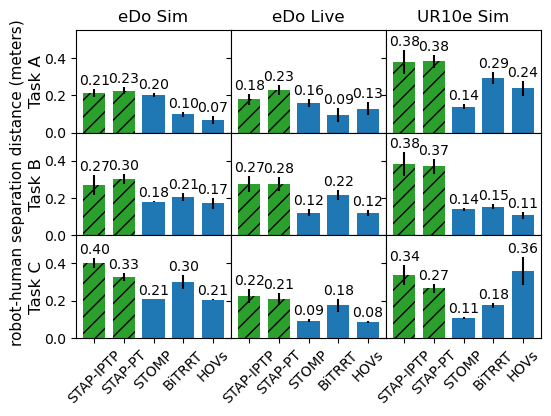

In [21]:
import matplotlib.pyplot as plt
edo_task1_sim_plot_tests = ['edo_avoid_task1_sim','edo_avoid2_task1_sim','edo_stomp_task1_sim','edo_birrt_replan_task1_1_sim','edo_prob_hamp_task1_sim']
edo_task3_sim_plot_tests = ['edo_avoid_task3_sim','edo_avoid2_task3_sim','edo_stomp_task3_sim','edo_birrt_replan_task3_1_sim','edo_prob_hamp_task3_sim']
edo_gator_sim_plot_tests = ['edo_avoid_gator_chomp_sim','edo_avoid2_gator_chomp_sim','edo_stomp_gator_chomp_sim','edo_birrt_replan_gator_chomp_sim','edo_prob_hamp_gator_chomp_sim']
    
edo_task3_live_plot_tests = ['edo_avoid_task3_live','edo_avoid2_task3_live','edo_stomp_task3_live','edo_birrt_replan_task3_live','edo_prob_hamp_task3_live']
edo_task1_live_plot_tests = ['edo_avoid_task1_live','edo_avoid2_task1_live','edo_stomp_task1_live','edo_birrt_replan_task1_live','edo_prob_hamp_task1_live']
edo_gator_live_plot_tests = ['edo_avoid_gator_chomp_live','edo_avoid2_gator_chomp_live','edo_stomp_gator_chomp_live','edo_birrt_replan_gator_chomp_live','edo_prob_hamp_gator_chomp_live']

sharework_task1_sim_plot_tests = ['sharework_avoid_task1_sim','sharework_avoid2_task1_sim','sharework_stomp_task1_sim','sharework_birrt_replan_task1_1_sim','sharework_prob_hamp_task1_sim']
sharework_task3_sim_plot_tests = ['sharework_avoid_task3_sim','sharework_avoid2_task3_sim','sharework_stomp_task3_sim','sharework_birrt_replan_task3_1_sim','sharework_prob_hamp_task3_sim']
sharework_gator_sim_plot_tests = ['sharework_avoid_gator_chomp_sim','sharework_avoid2_gator_chomp_sim','sharework_stomp_gator_chomp_sim','sharework_birrt_replan_gator_chomp_1_sim','sharework_prob_hamp_gator_chomp_sim']

fsize=10
fig1, ax1= plt.subplots(3,3,sharey='row',sharex=True,figsize=(6, 4))
plot_data = []
means = []
std_devs = []
for i in range(5):
    test = edo_task1_sim_plot_tests[i]
    plot_data.append(separation_dists[test])
    means.append(np.mean(separation_dists[test]))
    std_devs.append(np.std(separation_dists[test]))
whiskerprops = dict(linestyle='-',linewidth=1.4, color='black')
boxprops = dict(linewidth=1.4)
meanlineprops = dict(marker='D', markeredgecolor='black',
                      markerfacecolor='firebrick')
medianprops = dict(linestyle='-', linewidth=2.0, color='tab:blue')
width = 1.5
colors = ['tab:green','tab:green','tab:blue','tab:blue','tab:blue']
hatch = [ "//" , "//" , "","",""]
rects0 = ax1[0,0].bar(np.arange(5)+1,means,width/2,yerr=std_devs,color=colors,hatch=hatch)
ax1[0,0].bar_label(rects0, padding=1,fmt='%.2f',fontsize=fsize)

# pos = np.arange(5) + 1
# heights = [0.4,0.65,0.7,0.5,0.7]
# for tick in range(5):
#     ax[0,0].text(pos[tick], heights[tick], '{:.1f}'.format(means[tick]),
#              transform=ax[0,0].get_xaxis_transform(),
#              horizontalalignment='center')
plot_data = []
means = []
std_devs = []
for i in range(5):
    test = edo_task1_live_plot_tests[i]
    plot_data.append(separation_dists[test])
    means.append(np.mean(separation_dists[test]))
    std_devs.append(np.std(separation_dists[test]))

rects1 = ax1[0,1].bar(np.arange(5)+1,means,width/2,yerr=std_devs,color=colors,hatch=hatch)
ax1[0,1].bar_label(rects1, padding=1,fmt='%.2f',fontsize=fsize)

plot_data = []
means = []
std_devs = []
for i in range(5):
    test = sharework_task1_sim_plot_tests[i]
    plot_data.append(separation_dists[test])
    means.append(np.mean(separation_dists[test]))
    std_devs.append(np.std(separation_dists[test]))

rects2 = ax1[0,2].bar(np.arange(5)+1,means,width/2,yerr=std_devs,color=colors,hatch=hatch)
ax1[0,2].bar_label(rects2, padding=1,fmt='%.2f',fontsize=fsize)

ax1[0,0].set_ylabel('Task A', labelpad=0,fontsize=12)
plot_data = []
means = []
std_devs = []
for i in range(5):
    test = edo_task3_sim_plot_tests[i]
    plot_data.append(separation_dists[test])
    means.append(np.mean(separation_dists[test]))
    std_devs.append(np.std(separation_dists[test]))

rects3 = ax1[1,0].bar(np.arange(5)+1,means,width/2,yerr=std_devs,color=colors,hatch=hatch)
ax1[1,0].bar_label(rects3, padding=1,fmt='%.2f',fontsize=fsize)
    
plot_data = []
means = []
std_devs = []
for i in range(5):
    test = edo_task3_live_plot_tests[i]
    plot_data.append(separation_dists[test])
    means.append(np.mean(separation_dists[test]))
    std_devs.append(np.std(separation_dists[test]))

rects4 = ax1[1,1].bar(np.arange(5)+1,means,width/2,yerr=std_devs,color=colors,hatch=hatch)
ax1[1,1].bar_label(rects4, padding=1,fmt='%.2f',fontsize=fsize)
    
plot_data = []
means = []
std_devs = []
for i in range(5):
    test = sharework_task3_sim_plot_tests[i]
    plot_data.append(separation_dists[test])
    means.append(np.mean(separation_dists[test]))
    std_devs.append(np.std(separation_dists[test]))

rects5 = ax1[1,2].bar(np.arange(5)+1,means,width/2,yerr=std_devs,color=colors,hatch=hatch)
ax1[1,2].bar_label(rects5, padding=1,fmt='%.2f',fontsize=fsize)
    
ax1[1,0].set_ylabel('Task B', labelpad=0,fontsize=12)    
# pos = np.arange(5) + 1
# heights = [0.25,0.72,0.75,0.65,0.75]
# for tick, label in zip(range(5), ax2.get_xticklabels()):
#     k = tick % 2
#     ax2.text(pos[tick], heights[tick], '{:.1f}'.format(means[tick]),
#              transform=ax2.get_xaxis_transform(),
#              horizontalalignment='center', size='x-small')


plot_data = []
means = []
std_devs = []
for i in range(5):
    test = edo_gator_sim_plot_tests[i]
    plot_data.append(separation_dists[test])
    means.append(np.mean(separation_dists[test]))
    std_devs.append(np.std(separation_dists[test]))

rects6 = ax1[2,0].bar(np.arange(5)+1,means,width/2,yerr=std_devs,color=colors,hatch=hatch)
ax1[2,0].bar_label(rects6, padding=1,fmt='%.2f',fontsize=fsize)
    
plot_data = []
means = []
std_devs = []
for i in range(5):
    test = edo_gator_live_plot_tests[i]
    plot_data.append(separation_dists[test])
    means.append(np.mean(separation_dists[test]))
    std_devs.append(np.std(separation_dists[test]))

rects7 = ax1[2,1].bar(np.arange(5)+1,means,width/2,yerr=std_devs,color=colors,hatch=hatch)
ax1[2,1].bar_label(rects7, padding=1,fmt='%.2f',fontsize=fsize)
    
plot_data = []
means = []
std_devs = []
for i in range(5):
    test = sharework_gator_sim_plot_tests[i]
    plot_data.append(separation_dists[test])
    means.append(np.mean(separation_dists[test]))
    std_devs.append(np.std(separation_dists[test]))

rects8 = ax1[2,2].bar(np.arange(5)+1,means,width/2,yerr=std_devs,color=colors,hatch=hatch)
ax1[2,2].bar_label(rects8, padding=1,fmt='%.2f',fontsize=fsize)
    
ax1[2,0].set_ylabel('Task C', labelpad=0,fontsize=12) 
# ax[0,0].set_yticks([0,10,20,30])
# ax[1,0].set_yticks([0,10,20,30])
# ax[2,0].set_yticks([0,10,20,30])
test_name = ['STAP-IPTP','STAP-PT','STOMP','BiTRRT','HOVs']
ax1[2,0].set_xticks(range(1,6),test_name,rotation=45)
ax1[2,1].set_xticks(range(1,6),test_name,rotation=45)
ax1[2,2].set_xticks(range(1,6),test_name,rotation=45)

fig1.text(0.015, 0.5, 'robot-human separation distance (meters)', va='center', rotation='vertical',fontsize=11)

ax1[0,0].set_title('eDo Sim',fontsize=12)
ax1[0,1].set_title('eDo Live',fontsize=12)
ax1[0,2].set_title('UR10e Sim',fontsize=12)
ax1[0,0].set_yticks([0,0.2,0.4],fontsize=11)
ax1[1,0].set_yticks([0,0.2,0.4],fontsize=11)
ax1[2,0].set_yticks([0,0.2,0.4],fontsize=11)
ax1[0,0].set_ylim([0,0.55])
ax1[1,0].set_ylim([0,0.55])
ax1[2,0].set_ylim([0,0.55])

# pos = np.arange(5) + 1
# heights = [0.25,0.72,0.75,0.65,0.75]
# for tick, label in zip(range(5), ax3.get_xticklabels()):
#     k = tick % 2
#     ax3.text(pos[tick], heights[tick], '{:.1f}'.format(means[tick]),
#              transform=ax3.get_xaxis_transform(),
#              horizontalalignment='center', size='x-small')
plt.subplots_adjust(wspace=0, hspace=0.0)

In [2]:
import csv
import os
import numpy as np
import pickle

with open('final_times.pkl', 'rb') as f:
    final_times_arr = pickle.load(f)
with open('separation_dists.pkl', 'rb') as f:
    separation_dists = pickle.load(f)
with open('planned_times.pkl', 'rb') as f:
    planned_times = pickle.load(f)
with open('planned_time_errors.pkl', 'rb') as f:
    planned_time_errors_arr = pickle.load(f)
with open('planned_time_error_pcts.pkl', 'rb') as f:
    planned_time_error_pcts_arr = pickle.load(f)

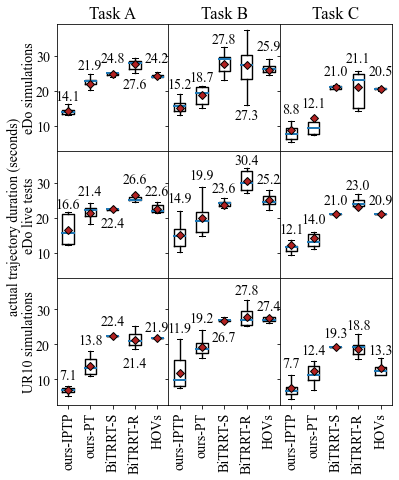

In [176]:
edo_task1_sim_plot_tests = ['edo_avoid_task1_sim','edo_avoid2_task1_sim','edo_birrt_task1_1_sim','edo_birrt_replan_task1_1_sim','edo_prob_hamp_task1_sim']
edo_task3_sim_plot_tests = ['edo_avoid_task3_sim','edo_avoid2_task3_sim','edo_birrt_task3_1_sim','edo_birrt_replan_task3_1_sim','edo_prob_hamp_task3_sim']
edo_gator_sim_plot_tests = ['edo_avoid_gator_chomp_sim','edo_avoid2_gator_chomp_sim','edo_birrt_gator_chomp_1_sim','edo_birrt_replan_gator_chomp_sim','edo_prob_hamp_gator_chomp_sim']
    
edo_task3_live_plot_tests = ['edo_avoid_task3_live','edo_avoid2_task3_live','edo_birrt_task3_live','edo_birrt_replan_task3_live','edo_prob_hamp_task3_live']
edo_task1_live_plot_tests = ['edo_avoid_task1_live','edo_avoid2_task1_live','edo_birrt_task1_live','edo_birrt_replan_task1_live','edo_prob_hamp_task1_live']
edo_gator_live_plot_tests = ['edo_avoid_gator_chomp_live','edo_avoid2_gator_chomp_live','edo_birrt_gator_chomp_live','edo_birrt_replan_gator_chomp_live','edo_prob_hamp_gator_chomp_live']

sharework_task1_sim_plot_tests = ['sharework_avoid_task1_sim','sharework_avoid2_task1_sim','sharework_birrt_task1_1_sim','sharework_birrt_replan_task1_1_sim','sharework_prob_hamp_task1_sim']
sharework_task3_sim_plot_tests = ['sharework_avoid_task3_sim','sharework_avoid2_task3_sim','sharework_birrt_task3_1_sim','sharework_birrt_replan_task3_1_sim','sharework_prob_hamp_task3_sim']
sharework_gator_sim_plot_tests = ['sharework_avoid_gator_chomp_sim','sharework_avoid2_gator_chomp_sim','sharework_birrt_gator_chomp_1_sim','sharework_birrt_replan_gator_chomp_1_sim','sharework_prob_hamp_gator_chomp_sim']


fig1, ax= plt.subplots(3,3,sharey=True,sharex=True,figsize=(6, 7))
# ax1.set_title('Trajectory Durations')
plot_data = []
means = []
for i in range(5):
    test = edo_task1_sim_plot_tests[i]
    plot_data.append(final_times_arr[test])
    means.append(np.mean(final_times_arr[test]))
# ax1.boxplot(plot_data,showfliers=False,
#             positions=np.array(np.arange(5))*0.5,
#             widths=0.3,
#             boxprops=dict(linewidth=3))
whiskerprops = dict(linestyle='-',linewidth=1.4, color='black')
boxprops = dict(linewidth=1.4)
meanlineprops = dict(marker='D', markeredgecolor='black',
                      markerfacecolor='firebrick')
medianprops = dict(linestyle='-', linewidth=2.0, color='tab:blue')
ax[0,0].boxplot(plot_data,showfliers=False,
            boxprops=boxprops,whiskerprops=whiskerprops,meanprops=meanlineprops, meanline=False,
                  showmeans=True,medianprops=medianprops)
pos = np.arange(5) + 1
heights = [0.4,0.65,0.7,0.5,0.7]
for tick in range(5):
    ax[0,0].text(pos[tick], heights[tick], '{:.1f}'.format(means[tick]),
             transform=ax[0,0].get_xaxis_transform(),
             horizontalalignment='center')
plot_data = []
means = []
for i in range(5):
    test = edo_task1_live_plot_tests[i]
    plot_data.append(final_times_arr[test])
    means.append(np.mean(final_times_arr[test]))
# ax1.boxplot(plot_data,showfliers=False,
#             positions=np.array(np.arange(5))*0.5+3,
#             widths=0.3,
#             boxprops=dict(linewidth=3))
ax[0,1].boxplot(plot_data,showfliers=False,
            boxprops=boxprops,whiskerprops=whiskerprops,meanprops=meanlineprops, meanline=False,
                  showmeans=True,medianprops=medianprops)
pos = np.arange(5) + 1
heights = [0.5,0.55,0.85,0.25,0.8]
for tick in range(5):
    ax[0,1].text(pos[tick], heights[tick], '{:.1f}'.format(means[tick]),
             transform=ax[0,1].get_xaxis_transform(),
             horizontalalignment='center')
plot_data = []
means = []
for i in range(5):
    test = sharework_task1_sim_plot_tests[i]
    plot_data.append(final_times_arr[test])
    means.append(np.mean(final_times_arr[test]))
# ax1.boxplot(plot_data,showfliers=False,
#             positions=np.array(np.arange(5))*0.5+6,
#             widths=0.3,
#             boxprops=dict(linewidth=3))
ax[0,2].boxplot(plot_data,showfliers=False,
            boxprops=boxprops,whiskerprops=whiskerprops,meanprops=meanlineprops, meanline=False,
                  showmeans=True,medianprops=medianprops)  
    
pos = np.arange(5) + 1
heights = [0.3,0.35,0.6,0.7,0.6]
for tick in range(5):
    ax[0,2].text(pos[tick], heights[tick], '{:.1f}'.format(means[tick]),
             transform=ax[0,2].get_xaxis_transform(),
             horizontalalignment='center')

ax[0,0].set_ylabel('eDo simulations', labelpad=0)
plot_data = []
means = []
for i in range(5):
    test = edo_task3_sim_plot_tests[i]
    plot_data.append(final_times_arr[test])
    means.append(np.mean(final_times_arr[test]))
# ax2.boxplot(plot_data,showfliers=False,
#             positions=np.array(np.arange(5))*0.5,
#             widths=0.3,
#             boxprops=dict(linewidth=3))
ax[1,0].boxplot(plot_data,showfliers=False,
            boxprops=boxprops,whiskerprops=whiskerprops,meanprops=meanlineprops, meanline=False,
                  showmeans=True,medianprops=medianprops)
    
pos = np.arange(5) + 1
heights = [0.55,0.65,0.4,0.75,0.65]
for tick in range(5):
    ax[1,0].text(pos[tick], heights[tick], '{:.1f}'.format(means[tick]),
             transform=ax[1,0].get_xaxis_transform(),
             horizontalalignment='center')
    
plot_data = []
means = []
for i in range(5):
    test = edo_task3_live_plot_tests[i]
    plot_data.append(final_times_arr[test])
    means.append(np.mean(final_times_arr[test]))
# ax2.boxplot(plot_data,showfliers=False,
#             positions=np.array(np.arange(5))*0.5+3,
#             widths=0.3,
#             boxprops=dict(linewidth=3))
ax[1,1].boxplot(plot_data,showfliers=False,
            boxprops=boxprops,whiskerprops=whiskerprops,meanprops=meanlineprops, meanline=False,
                  showmeans=True,medianprops=medianprops)
    
pos = np.arange(5) + 1
heights = [0.6,0.78,0.68,0.9,0.75]
for tick in range(5):
    ax[1,1].text(pos[tick], heights[tick], '{:.1f}'.format(means[tick]),
             transform=ax[1,1].get_xaxis_transform(),
             horizontalalignment='center')
    
plot_data = []
means = []
for i in range(5):
    test = sharework_task3_sim_plot_tests[i]
    plot_data.append(final_times_arr[test])
    means.append(np.mean(final_times_arr[test]))
# ax2.boxplot(plot_data,showfliers=False,
#             positions=np.array(np.arange(5))*0.5+6,
#             widths=0.3,
#             boxprops=dict(linewidth=3))
ax[1,2].boxplot(plot_data,showfliers=False,
            boxprops=boxprops,whiskerprops=whiskerprops,meanprops=meanlineprops, meanline=False,
                  showmeans=True,medianprops=medianprops)
      
pos = np.arange(5) + 1
heights = [0.35,0.43,0.58,0.7,0.58]
for tick in range(5):
    ax[1,2].text(pos[tick], heights[tick], '{:.1f}'.format(means[tick]),
             transform=ax[1,2].get_xaxis_transform(),
             horizontalalignment='center')
    
ax[1,0].set_ylabel('eDo live tests', labelpad=0)    
# pos = np.arange(5) + 1
# heights = [0.25,0.72,0.75,0.65,0.75]
# for tick, label in zip(range(5), ax2.get_xticklabels()):
#     k = tick % 2
#     ax2.text(pos[tick], heights[tick], '{:.1f}'.format(means[tick]),
#              transform=ax2.get_xaxis_transform(),
#              horizontalalignment='center', size='x-small')


plot_data = []
means = []
for i in range(5):
    test = edo_gator_sim_plot_tests[i]
    plot_data.append(final_times_arr[test])
    means.append(np.mean(final_times_arr[test]))
# ax3.boxplot(plot_data,showfliers=False,
#             positions=np.array(np.arange(5))*0.5,
#             widths=0.3,
#             boxprops=dict(linewidth=3))
ax[2,0].boxplot(plot_data,showfliers=False,
            boxprops=boxprops,whiskerprops=whiskerprops,meanprops=meanlineprops, meanline=False,
                  showmeans=True,medianprops=medianprops)
      
pos = np.arange(5) + 1
heights = [0.2,0.48,0.63,0.3,0.58]
for tick in range(5):
    ax[2,0].text(pos[tick], heights[tick], '{:.1f}'.format(means[tick]),
             transform=ax[2,0].get_xaxis_transform(),
             horizontalalignment='center')
    
plot_data = []
means = []
for i in range(5):
    test = edo_gator_live_plot_tests[i]
    plot_data.append(final_times_arr[test])
    means.append(np.mean(final_times_arr[test]))
# ax3.boxplot(plot_data,showfliers=False,
#             positions=np.array(np.arange(5))*0.5+3,
#             widths=0.3,
#             boxprops=dict(linewidth=3))
ax[2,1].boxplot(plot_data,showfliers=False,
            boxprops=boxprops,whiskerprops=whiskerprops,meanprops=meanlineprops, meanline=False,
                  showmeans=True,medianprops=medianprops)
      
pos = np.arange(5) + 1
heights = [0.57,0.65,0.5,0.87,0.75]
for tick in range(5):
    ax[2,1].text(pos[tick], heights[tick], '{:.1f}'.format(means[tick]),
             transform=ax[2,1].get_xaxis_transform(),
             horizontalalignment='center')
    
plot_data = []
means = []
for i in range(5):
    test = sharework_gator_sim_plot_tests[i]
    plot_data.append(final_times_arr[test])
    means.append(np.mean(final_times_arr[test]))
# ax3.boxplot(plot_data,showfliers=False,
#             positions=np.array(np.arange(5))*0.5+6,
#             widths=0.3,
#             boxprops=dict(linewidth=3))
ax[2,2].boxplot(plot_data,showfliers=False,
            boxprops=boxprops,whiskerprops=whiskerprops,meanprops=meanlineprops, meanline=False,
                  showmeans=True,medianprops=medianprops)

pos = np.arange(5) + 1
heights = [0.3,0.4,0.53,0.6,0.4]
for tick in range(5):
    ax[2,2].text(pos[tick], heights[tick], '{:.1f}'.format(means[tick]),
             transform=ax[2,2].get_xaxis_transform(),
             horizontalalignment='center')
    
ax[2,0].set_ylabel('UR10 simulations', labelpad=0)  
test_name = ['STAP-IPTP','STAP-PT','BiTRRT-S','BiTRRT-R','HOVs']
ax[2,0].set_xticks(range(1,6),test_name,rotation=90)
ax[2,1].set_xticks(range(1,6),test_name,rotation=90)
ax[2,2].set_xticks(range(1,6),test_name,rotation=90)

fig1.text(0.01, 0.5, 'actual trajectory duration (seconds)', va='center', rotation='vertical')
ax[0,0].set_title('Task A')
ax[0,1].set_title('Task B')
ax[0,2].set_title('Task C')

# pos = np.arange(5) + 1
# heights = [0.25,0.72,0.75,0.65,0.75]
# for tick, label in zip(range(5), ax3.get_xticklabels()):
#     k = tick % 2
#     ax3.text(pos[tick], heights[tick], '{:.1f}'.format(means[tick]),
#              transform=ax3.get_xaxis_transform(),
#              horizontalalignment='center', size='x-small')
plt.subplots_adjust(wspace=0, hspace=0.0)

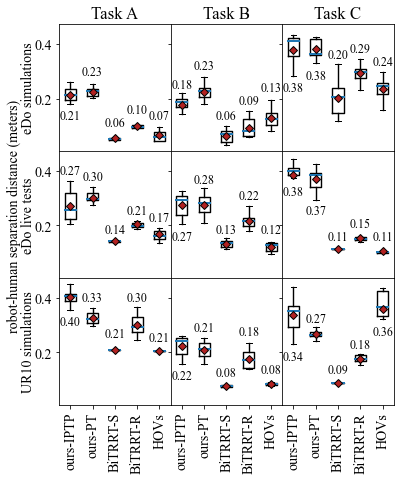

In [226]:
edo_task1_sim_plot_tests = ['edo_avoid_task1_sim','edo_avoid2_task1_sim','edo_birrt_task1_1_sim','edo_birrt_replan_task1_1_sim','edo_prob_hamp_task1_sim']
edo_task3_sim_plot_tests = ['edo_avoid_task3_sim','edo_avoid2_task3_sim','edo_birrt_task3_1_sim','edo_birrt_replan_task3_1_sim','edo_prob_hamp_task3_sim']
edo_gator_sim_plot_tests = ['edo_avoid_gator_chomp_sim','edo_avoid2_gator_chomp_sim','edo_birrt_gator_chomp_1_sim','edo_birrt_replan_gator_chomp_sim','edo_prob_hamp_gator_chomp_sim']
    
edo_task3_live_plot_tests = ['edo_avoid_task3_live','edo_avoid2_task3_live','edo_birrt_task3_live','edo_birrt_replan_task3_live','edo_prob_hamp_task3_live']
edo_task1_live_plot_tests = ['edo_avoid_task1_live','edo_avoid2_task1_live','edo_birrt_task1_live','edo_birrt_replan_task1_live','edo_prob_hamp_task1_live']
edo_gator_live_plot_tests = ['edo_avoid_gator_chomp_live','edo_avoid2_gator_chomp_live','edo_birrt_gator_chomp_live','edo_birrt_replan_gator_chomp_live','edo_prob_hamp_gator_chomp_live']

sharework_task1_sim_plot_tests = ['sharework_avoid_task1_sim','sharework_avoid2_task1_sim','sharework_birrt_task1_1_sim','sharework_birrt_replan_task1_1_sim','sharework_prob_hamp_task1_sim']
sharework_task3_sim_plot_tests = ['sharework_avoid_task3_sim','sharework_avoid2_task3_sim','sharework_birrt_task3_1_sim','sharework_birrt_replan_task3_1_sim','sharework_prob_hamp_task3_sim']
sharework_gator_sim_plot_tests = ['sharework_avoid_gator_chomp_sim','sharework_avoid2_gator_chomp_sim','sharework_birrt_gator_chomp_1_sim','sharework_birrt_replan_gator_chomp_1_sim','sharework_prob_hamp_gator_chomp_sim']


fig1, ax= plt.subplots(3,3,sharey=True,sharex=True,figsize=(6, 7))
# ax1.set_title('Trajectory Durations')
plot_data = []
means = []
for i in range(5):
    test = edo_task1_sim_plot_tests[i]
    plot_data.append(separation_dists[test])
    means.append(np.mean(separation_dists[test]))
# ax1.boxplot(plot_data,showfliers=False,
#             positions=np.array(np.arange(5))*0.5,
#             widths=0.3,
#             boxprops=dict(linewidth=3))
whiskerprops = dict(linestyle='-',linewidth=1.4, color='black')
boxprops = dict(linewidth=1.4)
meanlineprops = dict(marker='D', markeredgecolor='black',
                      markerfacecolor='firebrick')
medianprops = dict(linestyle='-', linewidth=2.0, color='tab:blue')
ax[0,0].boxplot(plot_data,showfliers=False,
            boxprops=boxprops,whiskerprops=whiskerprops,meanprops=meanlineprops, meanline=False,
                  showmeans=True,medianprops=medianprops)
pos = np.arange(5) + 1
heights = [0.25,0.6,0.2,0.3,0.25]
for tick in range(5):
    ax[0,0].text(pos[tick], heights[tick], '{:.2f}'.format(means[tick]),
             transform=ax[0,0].get_xaxis_transform(),
             horizontalalignment='center',fontsize=12)
plot_data = []
means = []
for i in range(5):
    test = edo_task1_live_plot_tests[i]
    plot_data.append(separation_dists[test])
    means.append(np.mean(separation_dists[test]))
# ax1.boxplot(plot_data,showfliers=False,
#             positions=np.array(np.arange(5))*0.5+3,
#             widths=0.3,
#             boxprops=dict(linewidth=3))
ax[0,1].boxplot(plot_data,showfliers=False,
            boxprops=boxprops,whiskerprops=whiskerprops,meanprops=meanlineprops, meanline=False,
                  showmeans=True,medianprops=medianprops)
pos = np.arange(5) + 1
heights = [0.5,0.65,0.25,0.37,0.47]
for tick in range(5):
    ax[0,1].text(pos[tick], heights[tick], '{:.2f}'.format(means[tick]),
             transform=ax[0,1].get_xaxis_transform(),
             horizontalalignment='center',fontsize=12)
plot_data = []
means = []
for i in range(5):
    test = sharework_task1_sim_plot_tests[i]
    plot_data.append(separation_dists[test])
    means.append(np.mean(separation_dists[test]))
# ax1.boxplot(plot_data,showfliers=False,
#             positions=np.array(np.arange(5))*0.5+6,
#             widths=0.3,
#             boxprops=dict(linewidth=3))
ax[0,2].boxplot(plot_data,showfliers=False,
            boxprops=boxprops,whiskerprops=whiskerprops,meanprops=meanlineprops, meanline=False,
                  showmeans=True,medianprops=medianprops)  
    
pos = np.arange(5) + 1
heights = [0.47,0.57,0.73,0.78,0.68]
for tick in range(5):
    ax[0,2].text(pos[tick], heights[tick], '{:.2f}'.format(means[tick]),
             transform=ax[0,2].get_xaxis_transform(),
             horizontalalignment='center',fontsize=12)

ax[0,0].set_ylabel('eDo simulations', labelpad=0)
plot_data = []
means = []
for i in range(5):
    test = edo_task3_sim_plot_tests[i]
    plot_data.append(separation_dists[test])
    means.append(np.mean(separation_dists[test]))
# ax2.boxplot(plot_data,showfliers=False,
#             positions=np.array(np.arange(5))*0.5,
#             widths=0.3,
#             boxprops=dict(linewidth=3))
ax[1,0].boxplot(plot_data,showfliers=False,
            boxprops=boxprops,whiskerprops=whiskerprops,meanprops=meanlineprops, meanline=False,
                  showmeans=True,medianprops=medianprops)
    
pos = np.arange(5) + 1
heights = [0.82,0.77,0.35,0.5,0.45]
for tick in range(5):
    ax[1,0].text(pos[tick], heights[tick], '{:.2f}'.format(means[tick]),
             transform=ax[1,0].get_xaxis_transform(),
             horizontalalignment='center',fontsize=12)
    
plot_data = []
means = []
for i in range(5):
    test = edo_task3_live_plot_tests[i]
    plot_data.append(separation_dists[test])
    means.append(np.mean(separation_dists[test]))
# ax2.boxplot(plot_data,showfliers=False,
#             positions=np.array(np.arange(5))*0.5+3,
#             widths=0.3,
#             boxprops=dict(linewidth=3))
ax[1,1].boxplot(plot_data,showfliers=False,
            boxprops=boxprops,whiskerprops=whiskerprops,meanprops=meanlineprops, meanline=False,
                  showmeans=True,medianprops=medianprops)
    
pos = np.arange(5) + 1
heights = [0.3,0.75,0.35,0.62,0.35]
for tick in range(5):
    ax[1,1].text(pos[tick], heights[tick], '{:.2f}'.format(means[tick]),
             transform=ax[1,1].get_xaxis_transform(),
             horizontalalignment='center',fontsize=12)
    
plot_data = []
means = []
for i in range(5):
    test = sharework_task3_sim_plot_tests[i]
    plot_data.append(separation_dists[test])
    means.append(np.mean(separation_dists[test]))
# ax2.boxplot(plot_data,showfliers=False,
#             positions=np.array(np.arange(5))*0.5+6,
#             widths=0.3,
#             boxprops=dict(linewidth=3))
ax[1,2].boxplot(plot_data,showfliers=False,
            boxprops=boxprops,whiskerprops=whiskerprops,meanprops=meanlineprops, meanline=False,
                  showmeans=True,medianprops=medianprops)
      
pos = np.arange(5) + 1
heights = [0.65,0.5,0.30,0.40,0.30]
for tick in range(5):
    ax[1,2].text(pos[tick], heights[tick], '{:.2f}'.format(means[tick]),
             transform=ax[1,2].get_xaxis_transform(),
             horizontalalignment='center',fontsize=12)
    
ax[1,0].set_ylabel('eDo live tests', labelpad=0)    
# pos = np.arange(5) + 1
# heights = [0.25,0.72,0.75,0.65,0.75]
# for tick, label in zip(range(5), ax2.get_xticklabels()):
#     k = tick % 2
#     ax2.text(pos[tick], heights[tick], '{:.2f}'.format(means[tick]),
#              transform=ax2.get_xaxis_transform(),
#              horizontalalignment='center', size='x-small')


plot_data = []
means = []
for i in range(5):
    test = edo_gator_sim_plot_tests[i]
    plot_data.append(separation_dists[test])
    means.append(np.mean(separation_dists[test]))
# ax3.boxplot(plot_data,showfliers=False,
#             positions=np.array(np.arange(5))*0.5,
#             widths=0.3,
#             boxprops=dict(linewidth=3))
ax[2,0].boxplot(plot_data,showfliers=False,
            boxprops=boxprops,whiskerprops=whiskerprops,meanprops=meanlineprops, meanline=False,
                  showmeans=True,medianprops=medianprops)
      
pos = np.arange(5) + 1
heights = [0.63,0.82,0.53,0.82,0.5]
for tick in range(5):
    ax[2,0].text(pos[tick], heights[tick], '{:.2f}'.format(means[tick]),
             transform=ax[2,0].get_xaxis_transform(),
             horizontalalignment='center',fontsize=12)
    
plot_data = []
means = []
for i in range(5):
    test = edo_gator_live_plot_tests[i]
    plot_data.append(separation_dists[test])
    means.append(np.mean(separation_dists[test]))
# ax3.boxplot(plot_data,showfliers=False,
#             positions=np.array(np.arange(5))*0.5+3,
#             widths=0.3,
#             boxprops=dict(linewidth=3))
ax[2,1].boxplot(plot_data,showfliers=False,
            boxprops=boxprops,whiskerprops=whiskerprops,meanprops=meanlineprops, meanline=False,
                  showmeans=True,medianprops=medianprops)
      
pos = np.arange(5) + 1
heights = [0.2,0.58,0.23,0.55,0.25]
for tick in range(5):
    ax[2,1].text(pos[tick], heights[tick], '{:.2f}'.format(means[tick]),
             transform=ax[2,1].get_xaxis_transform(),
             horizontalalignment='center',fontsize=12)
    
plot_data = []
means = []
for i in range(5):
    test = sharework_gator_sim_plot_tests[i]
    plot_data.append(separation_dists[test])
    means.append(np.mean(separation_dists[test]))
# ax3.boxplot(plot_data,showfliers=False,
#             positions=np.array(np.arange(5))*0.5+6,
#             widths=0.3,
#             boxprops=dict(linewidth=3))
ax[2,2].boxplot(plot_data,showfliers=False,
            boxprops=boxprops,whiskerprops=whiskerprops,meanprops=meanlineprops, meanline=False,
                  showmeans=True,medianprops=medianprops)

pos = np.arange(5) + 1
heights = [0.35,0.65,0.25,0.45,0.55]
for tick in range(5):
    ax[2,2].text(pos[tick], heights[tick], '{:.2f}'.format(means[tick]),
             transform=ax[2,2].get_xaxis_transform(),
             horizontalalignment='center',fontsize=12)
    
ax[2,0].set_ylabel('UR10 simulations', labelpad=0)  
test_name = ['STAP-IPTP','STAP-PT','BiTRRT-S','BiTRRT-R','HOVs']
ax[2,0].set_xticks(range(1,6),test_name,rotation=90)
ax[2,1].set_xticks(range(1,6),test_name,rotation=90)
ax[2,2].set_xticks(range(1,6),test_name,rotation=90)

fig1.text(0.005, 0.5, 'robot-human separation distance (meters)', va='center', rotation='vertical')
ax[0,0].set_title('Task A')
ax[0,1].set_title('Task B')
ax[0,2].set_title('Task C')

# pos = np.arange(5) + 1
# heights = [0.25,0.72,0.75,0.65,0.75]
# for tick, label in zip(range(5), ax3.get_xticklabels()):
#     k = tick % 2
#     ax3.text(pos[tick], heights[tick], '{:.2f}'.format(means[tick]),
#              transform=ax3.get_xaxis_transform(),
#              horizontalalignment='center', size='x-small')
plt.subplots_adjust(wspace=0, hspace=0.0)

In [7]:
edo_task3_live_plot_tests = ['edo_avoid_task3_live','edo_avoid2_task3_live','edo_birrt_task3_live','edo_birrt_replan_task3_live','edo_prob_hamp_task3_live']
edo_task1_live_plot_tests = ['edo_avoid_task1_live','edo_avoid2_task1_live','edo_birrt_task1_live','edo_birrt_replan_task1_live','edo_prob_hamp_task1_live']
edo_gator_live_plot_tests = ['edo_avoid_gator_chomp_live','edo_avoid2_gator_chomp_live','edo_birrt_gator_chomp_live','edo_birrt_replan_gator_chomp_live','edo_prob_hamp_gator_chomp_live']

In [ ]:
sharework_task1_sim_plot_tests = ['sharework_avoid_task1_sim','sharework_avoid2_task1_sim','sharework_birrt_task1_1_sim','sharework_birrt_replan_task1_1_sim','sharework_prob_hamp_task1_sim']
sharework_task3_sim_plot_tests = ['sharework_avoid_task3_sim','sharework_avoid2_task3_sim','sharework_birrt_task3_1_sim','sharework_birrt_replan_task3_1_sim','sharework_prob_hamp_task3_sim']
sharework_gator_sim_plot_tests = ['sharework_avoid_gator_chomp_sim','sharework_avoid2_gator_chomp_sim','sharework_birrt_gator_chomp_1_sim','sharework_birrt_replan_gator_chomp_1_sim','sharework_prob_hamp_gator_chomp_sim']


samples:100
optimal:5.3004325
180
6.09817


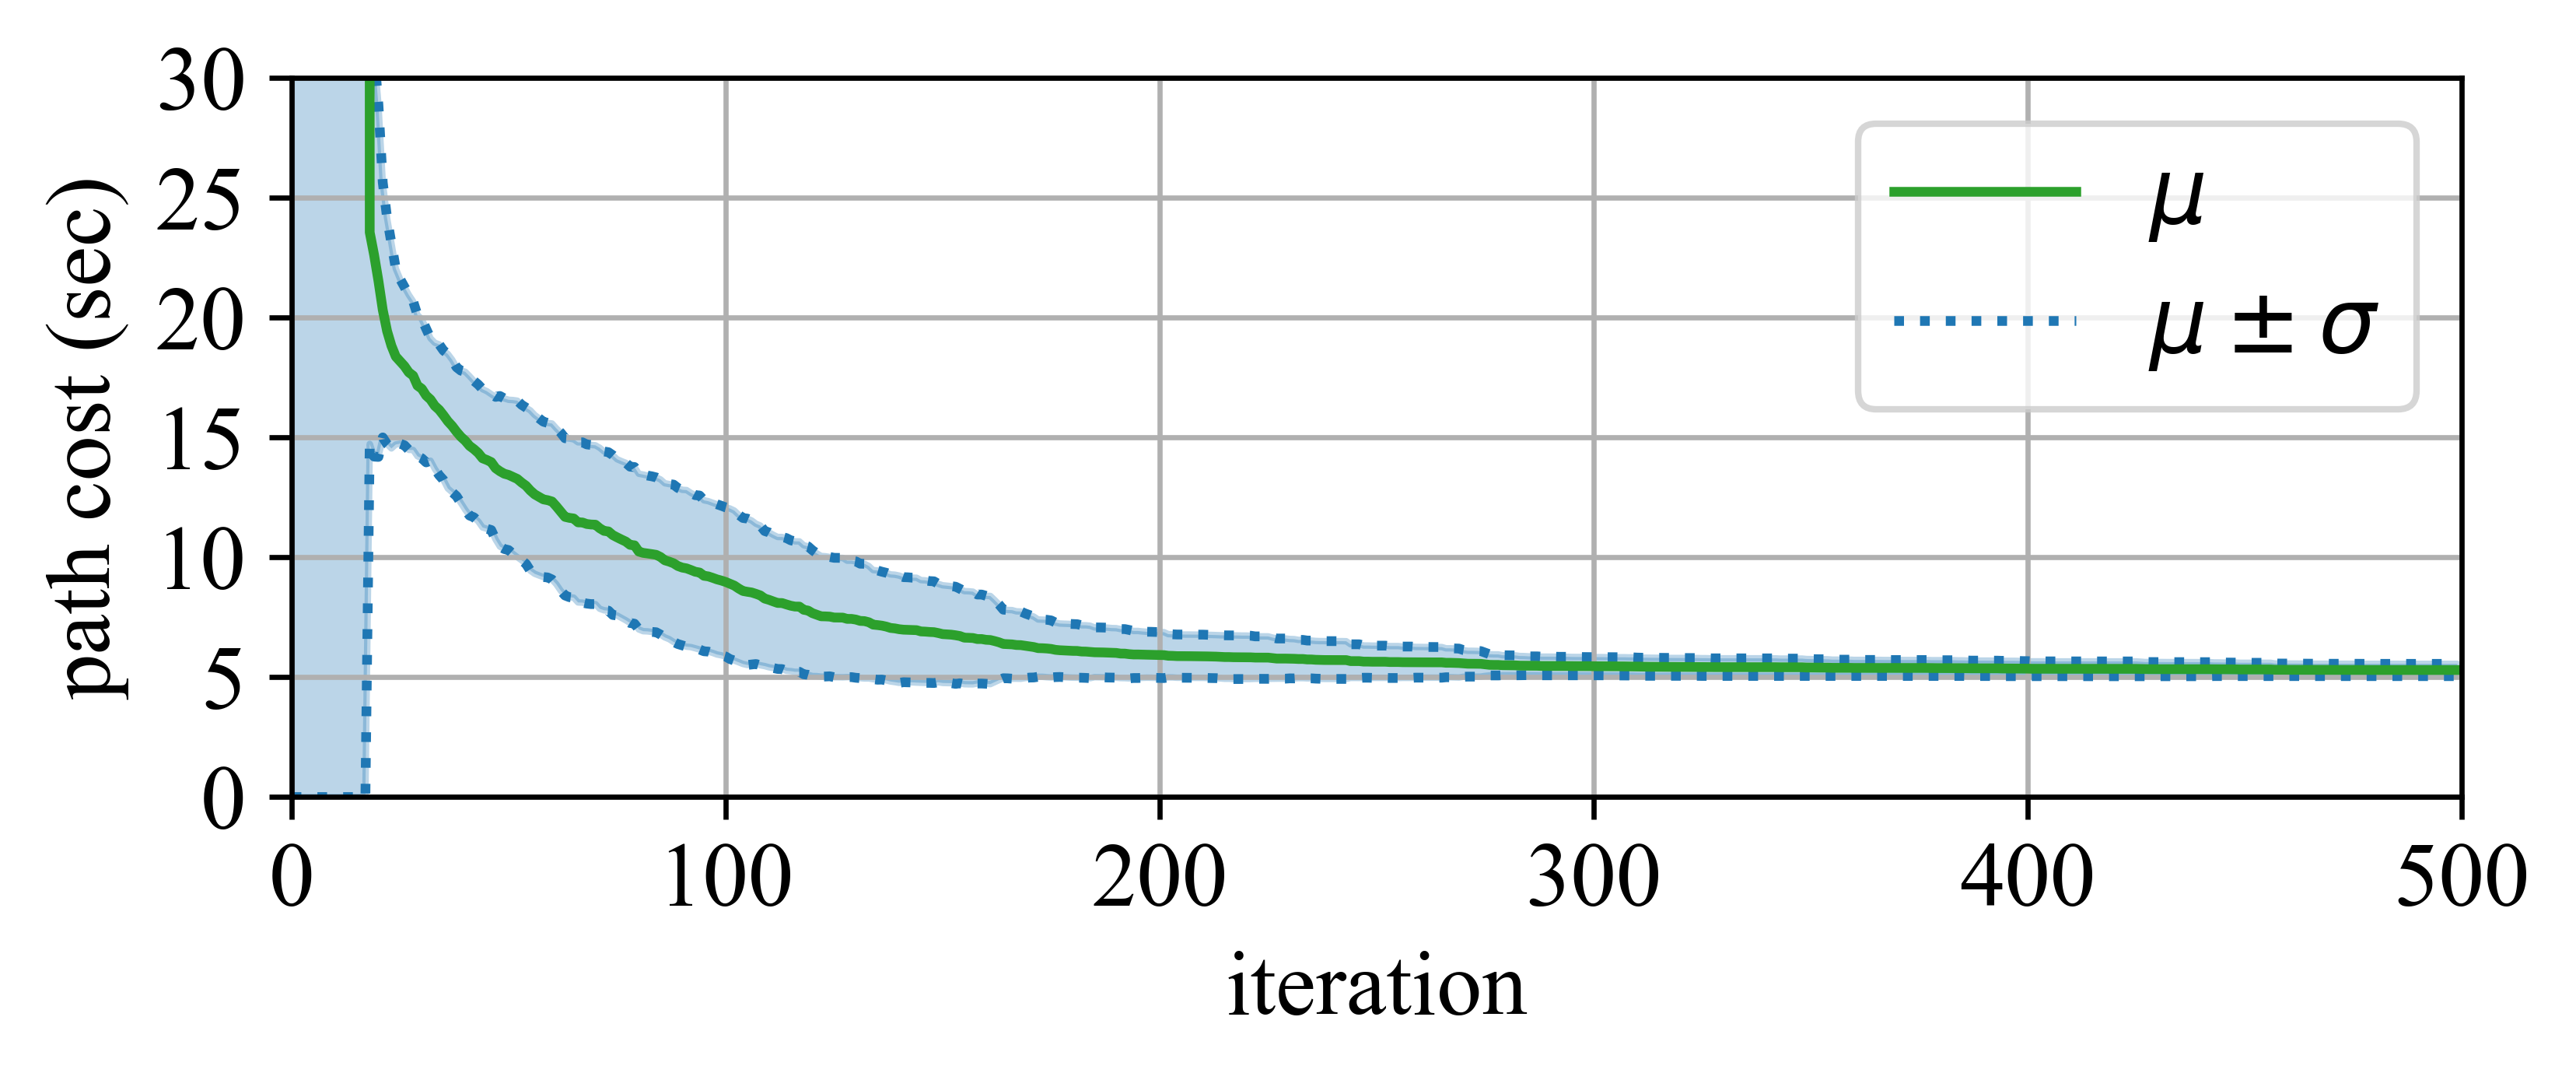

In [2]:
import csv
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 600

samples = np.empty((500,0))
times = np.empty((500,0))

filename = 'avoid_gator_chomp_solver_perf_sim_100_tests.csv'
with open(filename) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    prev_iter = 0
    sample = np.zeros((500,1))
    time_col = np.zeros((500,1))
    for row in csv_reader:
#         print('{}, {}'.format(test,row))
        if row[0]=='time':
            continue
        try:
            sample_iter = int(row[1])
        except:
            continue
        if sample_iter<prev_iter:
            samples = np.append(samples,sample,axis=1)
            times = np.append(times,time_col,axis=1)
            prev_iter = 0
        try:
            sample[sample_iter,0] = float(row[2])
            time_col[sample_iter,0] = float(row[0])
            prev_iter = sample_iter
        except:
            sample[sample_iter,0] = sample[prev_iter,0]
            time_col[sample_iter,0] = time_col[prev_iter,0]

print('samples:{}'.format(samples.shape[1]))
sample_means = np.mean(samples,axis=1)
print('optimal:{}'.format(sample_means[-1]))
sample_devs = np.std(samples,axis=1)
dev_up_lim = sample_means+sample_devs
dev_low_lim = np.maximum(sample_means-sample_devs,np.zeros_like(sample_means))
x_vals = range(sample_means.shape[0])
low_lim = (sample_means-sample_devs)>0
start_idx = 0
for i in range(1,low_lim.shape[0]):
    if (not low_lim[i-1]) and low_lim[i]:
        start_idx = i
        break
        
dev_low_lim[:start_idx] = 0.0

font = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 14}

mpl.rc('font', **font)

fig, ax1 = plt.subplots(1, 1,sharex=True,figsize=(6, 2.))
ax1.plot(x_vals,dev_up_lim,color='tab:blue',linestyle='dotted',label=r'$\mu\pm\sigma$')
ax1.plot(x_vals,dev_low_lim,color='tab:blue',linestyle='dotted')
ax1.fill_between(x_vals, dev_low_lim,dev_up_lim,alpha=0.3,color='tab:blue')
ax1.plot(x_vals,sample_means,color='tab:green',label=r'$\mu$')
ax1.set_ylim([0,30])
ax1.set_xlim([0,500])
ax1.set_yticks([0,5,10,15,20,25,30])
ax1.set_ylabel('path cost (sec)')
# ax1.set_xlabel('iteration')
handles, labels = ax1.get_legend_handles_labels()
ax1.legend([handles[1],handles[0]],[labels[1],labels[0]])

t_means = np.mean(times,axis=1)
idx = np.argmin(np.abs(t_means-30))
print(idx)
print(sample_means[idx])
t_devs = np.std(times,axis=1)
dev_up_lim = t_means+t_devs
dev_low_lim = np.maximum(t_means-t_devs,np.zeros_like(t_means))

# # fig2, ax2 = plt.subplots(1, 1,figsize=(8, 3))
# ax2.plot(x_vals,dev_up_lim,color='tab:blue',linestyle='dotted',label=r'$\mu\pm\sigma$')
# ax2.plot(x_vals,dev_low_lim,color='tab:blue',linestyle='dotted')
# ax2.fill_between(x_vals, dev_low_lim,dev_up_lim,alpha=0.3,color='tab:blue')
# ax2.plot(x_vals,t_means,color='tab:green',label=r'$\mu$')
# ax2.set_ylim([0,240])
# ax2.set_xlim([0,500])
# ax2.set_yticks([0,50,100,150,200])
# ax2.set_ylabel('planning time (sec)')
# ax2.set_xlabel('iteration')
# handles, labels = ax2.get_legend_handles_labels()
# ax2.legend([handles[1],handles[0]],[labels[1],labels[0]])
ax1.set_xlabel('iteration')
ax1.grid()
# ax2.grid()
# plt.subplots_adjust(wspace=0, hspace=0.05)
plt.show()

In [13]:
import csv
import os
import numpy as np

samples = {}
for subdir, dirs, filenames in os.walk(os. getcwd()):
    if not subdir.endswith('sharework'):
        continue
    filenames.sort()
    for filename in filenames:
        if filename.endswith('.csv') and (not 'solver_perf' in filename) and ('stomp' in filename) and (not ('plan' in filename)):
            test = os.path.split(subdir)[-1] + '_'+filename[:-4]
            print(test)
            with open(os.path.join(subdir,filename)) as csv_file:
                csv_reader = csv.reader(csv_file, delimiter=',')
                line_count = 0
                prev_time = 0
                sample = np.empty((0,275))
                final_times = np.empty((0))
                planned_time = np.empty((0))
                planned_time_errors = np.empty((0))
                planned_time_error_pcts = np.empty((0))
                int_d_dts = np.empty((0))
                int_d_dt = 0
                for row in csv_reader:
#                     print('{}, {}'.format(test,row[0]))
                    if row[0]=='t':
                        continue
                    if float(row[0])<prev_time:
    #                     print(samples)
                        samples.setdefault(test, []).append(sample)
                        final_times = np.append(final_times,[sample[-1,0]])
#                         print(sample[0,272])
                        planned_time = np.append(planned_time,sample[0,272])
                        planned_time_errors = np.append(planned_time_errors,final_times[-1]-sample[0,272])
                        planned_time_error_pcts = np.append(planned_time_error_pcts,planned_time_errors[-1]/planned_time[-1]*100)
                        tmp_samples = sample[sample[:,271]!=0,273]
                        int_d_dts = np.append(int_d_dts,np.sum(tmp_samples)/tmp_samples.shape[0])
                        sample = np.empty((0,275))
#                         int_d_dts = np.append(int_d_dts,[int_d_dt/final_times[-1]])
                        int_d_dt = 0
                        prev_time = 0
                    row = ['0.0' if x==' ' else x for x in row]
                    try:
                        sample = np.append(sample,np.asarray(row).astype(float).reshape((1,275)),axis=0)
#                         if sample[-1,274]<0.5:
                        int_d_dt += sample[-1,273]*(float(row[0])-prev_time)
                        if ((float(row[0])-prev_time)<0) or (sample[-1,273]<0):
                            print('{},{},{}'.format(row[0],prev_time,sample[-1,273]))
                    except:
                        print('error:{}'.format(row))
                        pass
                    prev_time = float(row[0])
                samples.setdefault(test, []).append(sample)
                final_times = np.append(final_times,[sample[-1,0]])
                final_times_arr[test] = final_times
                print('{}:{} samples, \n\tavg final time:{:.3f} ({:.5f}),\n\tint_dist {:.3f} ({:.5f}), \n\tplan time {:.3f} ({:.5f}), \n\tpt error {:.3f} ({:.5f}), \n\tpt error % {:.3f} ({:.5f})'.format(test,len(samples[test]),np.mean(final_times),np.std(final_times),np.mean(int_d_dts),np.std(int_d_dts),np.mean(planned_time),np.std(planned_time),np.mean(planned_time_errors),np.std(planned_time_errors),np.mean(planned_time_error_pcts),np.std(planned_time_error_pcts)))

sharework_stomp_gator_chomp_sim
sharework_stomp_gator_chomp_sim:10 samples, 
	avg final time:19.553 (0.11758),
	int_dist 0.107 (0.00452), 
	plan time 1.357 (0.13170), 
	pt error 18.184 (0.03751), 
	pt error % 1352.493 (126.04161)
sharework_stomp_task1_sim
sharework_stomp_task1_sim:10 samples, 
	avg final time:20.515 (0.05347),
	int_dist 0.139 (0.01466), 
	plan time 1.259 (0.17657), 
	pt error 19.257 (0.19782), 
	pt error % 1559.877 (220.19867)
sharework_stomp_task3_sim
sharework_stomp_task3_sim:10 samples, 
	avg final time:21.230 (0.07521),
	int_dist 0.139 (0.00778), 
	plan time 1.535 (0.22786), 
	pt error 19.699 (0.24294), 
	pt error % 1317.425 (228.02033)


In [14]:
tmp = np.empty((0))
tmp = np.append(tmp,14.1/np.mean([21.9,13.0,27.6,24.2]))
tmp = np.append(tmp,16.6/np.mean([21.4,22.2,26.6,22.6]))
tmp = np.append(tmp,7.1/np.mean([13.8,22.4,21.4,22.0]))
tmp = np.append(tmp,15.2/np.mean([18.7,17.2,27.3,25.9]))
tmp = np.append(tmp,14.9/np.mean([19.9,24.4,30.4,25.2]))
tmp = np.append(tmp,11.9/np.mean([19.2,26.1,27.8,27.4]))
tmp = np.append(tmp,8.8/np.mean([12.1,20.5,21.1,20.5]))
tmp = np.append(tmp,12.1/np.mean([14.0,21.2,23.0,20.9]))
tmp = np.append(tmp,7.7/np.mean([12.4,19.6,18.8,13.3]))
print(np.mean(tmp))
print(1-np.mean(tmp[0:3]))
print(1-np.mean(tmp[3:6]))
print(1-np.mean(tmp[6:9]))

0.5602449356726237
0.4257266026269436
0.4157974045204559
0.47774118583472913


In [15]:
tmp = np.empty((0))
tmp = np.append(tmp,14.1/np.mean([13.0,27.6,24.2]))
tmp = np.append(tmp,16.6/np.mean([22.2,26.6,22.6]))
tmp = np.append(tmp,7.1/np.mean([22.4,21.4,22.0]))
tmp = np.append(tmp,15.2/np.mean([17.2,27.3,25.9]))
tmp = np.append(tmp,14.9/np.mean([24.4,30.4,25.2]))
tmp = np.append(tmp,11.9/np.mean([26.1,27.8,27.4]))
tmp = np.append(tmp,8.8/np.mean([20.5,21.1,20.5]))
tmp = np.append(tmp,12.1/np.mean([21.2,23.0,20.9]))
tmp = np.append(tmp,7.7/np.mean([19.6,18.8,13.3]))
print(np.mean(tmp))
print(1-np.mean(tmp[0:3]))
print(1-np.mean(tmp[3:6]))
print(1-np.mean(tmp[6:9]))

0.5276766233504037
0.4420116746462178
0.4514694453762721
0.5234890099262992


In [21]:
tmp = np.empty((0))
tmp = np.append(tmp,[14.1])
tmp = np.append(tmp,[16.6])
tmp = np.append(tmp,[7.1])
tmp = np.append(tmp,[15.2])
tmp = np.append(tmp,[14.9])
tmp = np.append(tmp,[11.9])
tmp = np.append(tmp,[8.8])
tmp = np.append(tmp,[12.1])
tmp = np.append(tmp,[7.7])
tmp2 = np.empty((0))
tmp2 = np.append(tmp2,[14.6])
tmp2 = np.append(tmp2,[10.5])
tmp2 = np.append(tmp2,[5.7])
tmp2 = np.append(tmp2,[15.5])
tmp2 = np.append(tmp2,[11.0])
tmp2 = np.append(tmp2,[7.3])
tmp2 = np.append(tmp2,[9.4])
tmp2 = np.append(tmp2,[12.6])
tmp2 = np.append(tmp2,[12.4])
err = tmp-tmp2
print(np.mean(np.divide(err,tmp2)))

0.1416780953170759


In [10]:
tmp = np.empty((0))
tmp = np.append(tmp,[21.9])
tmp = np.append(tmp,[21.4])
tmp = np.append(tmp,[13.8])
tmp = np.append(tmp,[18.7])
tmp = np.append(tmp,[19.9])
tmp = np.append(tmp,[19.2])
tmp = np.append(tmp,[12.1])
tmp = np.append(tmp,[14.0])
tmp = np.append(tmp,[12.4])
tmp2 = np.empty((0))
tmp2 = np.append(tmp2,[14.4])
tmp2 = np.append(tmp2,[10.4])
tmp2 = np.append(tmp2,[5.7])
tmp2 = np.append(tmp2,[16.8])
tmp2 = np.append(tmp2,[14.8])
tmp2 = np.append(tmp2,[9.6])
tmp2 = np.append(tmp2,[10.3])
tmp2 = np.append(tmp2,[8.9])
tmp2 = np.append(tmp2,[6.1])
err = tmp-tmp2
print(np.mean(np.divide(err,tmp2)))

0.6930939977732099


In [2]:
planned_times['edo_stomp_gator_chomp_live'] = [5.14505,5.14505,5.14505,5.14505,5.14505,5.14505,5.14505,5.14505,5.14505,5.14505]
planned_times['edo_stomp_task1_live'] = [5.63692,5.91566,5.72961,5.79483,5.7652,5.79746,5.84584,5.63425,5.60768,5.60745]
planned_times['edo_stomp_task3_live'] = [6.57309,6.79805,6.8158,7.03442,6.68466,6.95487,6.66354,6.97385,6.8842,6.59422]

In [12]:
print(final_times_arr['edo_prob_hamp_gator_chomp_live'])

[26.2667 29.4667 26.8167 27.1334 26.4834]


In [11]:
# print(planned_time_error_pcts_arr)
all_tests = ['edo_avoid_task1_sim','edo_avoid2_task1_sim','edo_stomp_task1_sim','edo_birrt_replan_task1_1_sim','edo_prob_hamp_task1_sim',
'edo_avoid_task3_sim','edo_avoid2_task3_sim','edo_stomp_task3_sim','edo_birrt_replan_task3_1_sim','edo_prob_hamp_task3_sim',
'edo_avoid_gator_chomp_sim','edo_avoid2_gator_chomp_sim','edo_stomp_gator_chomp_sim','edo_birrt_replan_gator_chomp_sim','edo_prob_hamp_gator_chomp_sim',
'edo_avoid_task3_live','edo_avoid2_task3_live','edo_stomp_task3_live','edo_birrt_replan_task3_live','edo_prob_hamp_task3_live',
'edo_avoid_task1_live','edo_avoid2_task1_live','edo_stomp_task1_live','edo_birrt_replan_task1_live','edo_prob_hamp_task1_live',
'edo_avoid_gator_chomp_live','edo_avoid2_gator_chomp_live','edo_stomp_gator_chomp_live','edo_birrt_replan_gator_chomp_live','edo_prob_hamp_gator_chomp_live',
'sharework_avoid_task1_sim','sharework_avoid2_task1_sim','sharework_stomp_task1_sim','sharework_birrt_replan_task1_1_sim','sharework_prob_hamp_task1_sim',
'sharework_avoid_task3_sim','sharework_avoid2_task3_sim','sharework_stomp_task3_sim','sharework_birrt_replan_task3_1_sim','sharework_prob_hamp_task3_sim',
'sharework_avoid_gator_chomp_sim','sharework_avoid2_gator_chomp_sim','sharework_stomp_gator_chomp_sim','sharework_birrt_replan_gator_chomp_1_sim','sharework_prob_hamp_gator_chomp_sim']

test1 = np.empty((0))
test2 = np.empty((0))
test3 = np.empty((0))
test4 = np.empty((0))
test5 = np.empty((0))
for test in planned_time_errors_arr.keys():
    if test not in all_tests:
        continue
    print(test)
    print(planned_time_errors_arr[test])
    if 'avoid_' in test:
        test1 = np.append(test1,planned_time_error_pcts_arr[test])
#         test1 = np.append(test1,(final_times_arr[test]-planned_times[test])/planned_times[test]*100)
    elif 'avoid2' in test:
        test2 = np.append(test2,planned_time_error_pcts_arr[test])
    elif ('stomp' in test) and (not 'replan' in test):
        test3 = np.append(test3,(final_times_arr[test]-planned_times[test])/planned_times[test]*100)
    elif 'birrt_replan' in test:
        if 'edo_birrt_replan_task3_live' in test:
            test4 = np.append(test4,np.ones((10))*5.07)
        else:
            test4 = np.append(test4,planned_time_error_pcts_arr[test])
    elif 'prob_hamp' in test:
        if 'edo_prob_hamp_gator_chomp_live' == test:
            test5 = np.append(test5,np.ones((10))*6.75)
        else:
            test5 = np.append(test5,planned_time_error_pcts_arr[test])
print('avoid:{:.0f}, avoid2:{:.0f}, stomp:{:.0f}, bitrrt-r:{:.0f},prob_hamp:{:.0f}'.format(np.mean(test1),np.mean(test2),np.mean(test3),np.mean(test4),np.mean(test5)))

edo_avoid2_gator_chomp_live
[11.7514  11.79072  8.52585 10.6065   6.4141   5.6691  15.03941  8.1101
  8.7311   9.93217]
edo_avoid2_gator_chomp_sim
[11.2729   6.49258  9.29068  5.87215 12.54842  5.61275  6.25025 10.15707
  5.47794 13.23239]
edo_avoid2_task1_live
[0.5166 3.8743 0.8381 0.5227 0.7038 1.4688 7.5705 0.7585 0.7428 1.1112]
edo_avoid2_task1_sim
[ 3.5024  9.8352  8.2011  8.2977 10.1863  5.4095  8.3256  6.4485  7.9862
  1.5527]
edo_avoid2_task3_live
[ 3.0823  10.3697   1.2657  11.0493   2.0914   1.7458   5.54083  7.9811
  3.1431  13.8471 ]
edo_avoid2_task3_sim
[12.8522  12.2293  12.611    8.12721  9.7287  11.3236  12.4003  12.3529
  7.2725  12.2216 ]
edo_avoid_gator_chomp_live
[ 2.83114  2.81393  1.90185  2.20203 14.26154 10.47472  7.45569  4.06155
 -1.5132   1.05583  4.71433]
edo_avoid_gator_chomp_sim
[2.18869 1.28985 2.00928 2.15541 2.22695 1.62852 0.73651 0.32549 1.4343
 0.29167 0.93647 0.15167]
edo_avoid_task1_live
[-8.1813  2.9675 -6.8331  3.5887 -1.0404  0.0118  1.8608  3.9

ValueError: operands could not be broadcast together with shapes (5,) (10,) 

In [308]:
print(test3.shape)

(81,)


In [35]:
print(final_times_arr['edo_stomp_gator_chomp_live'])

[26.5667 26.4167 27.3334 25.8667 25.6001 26.5834 25.9501 25.5667 25.9334]


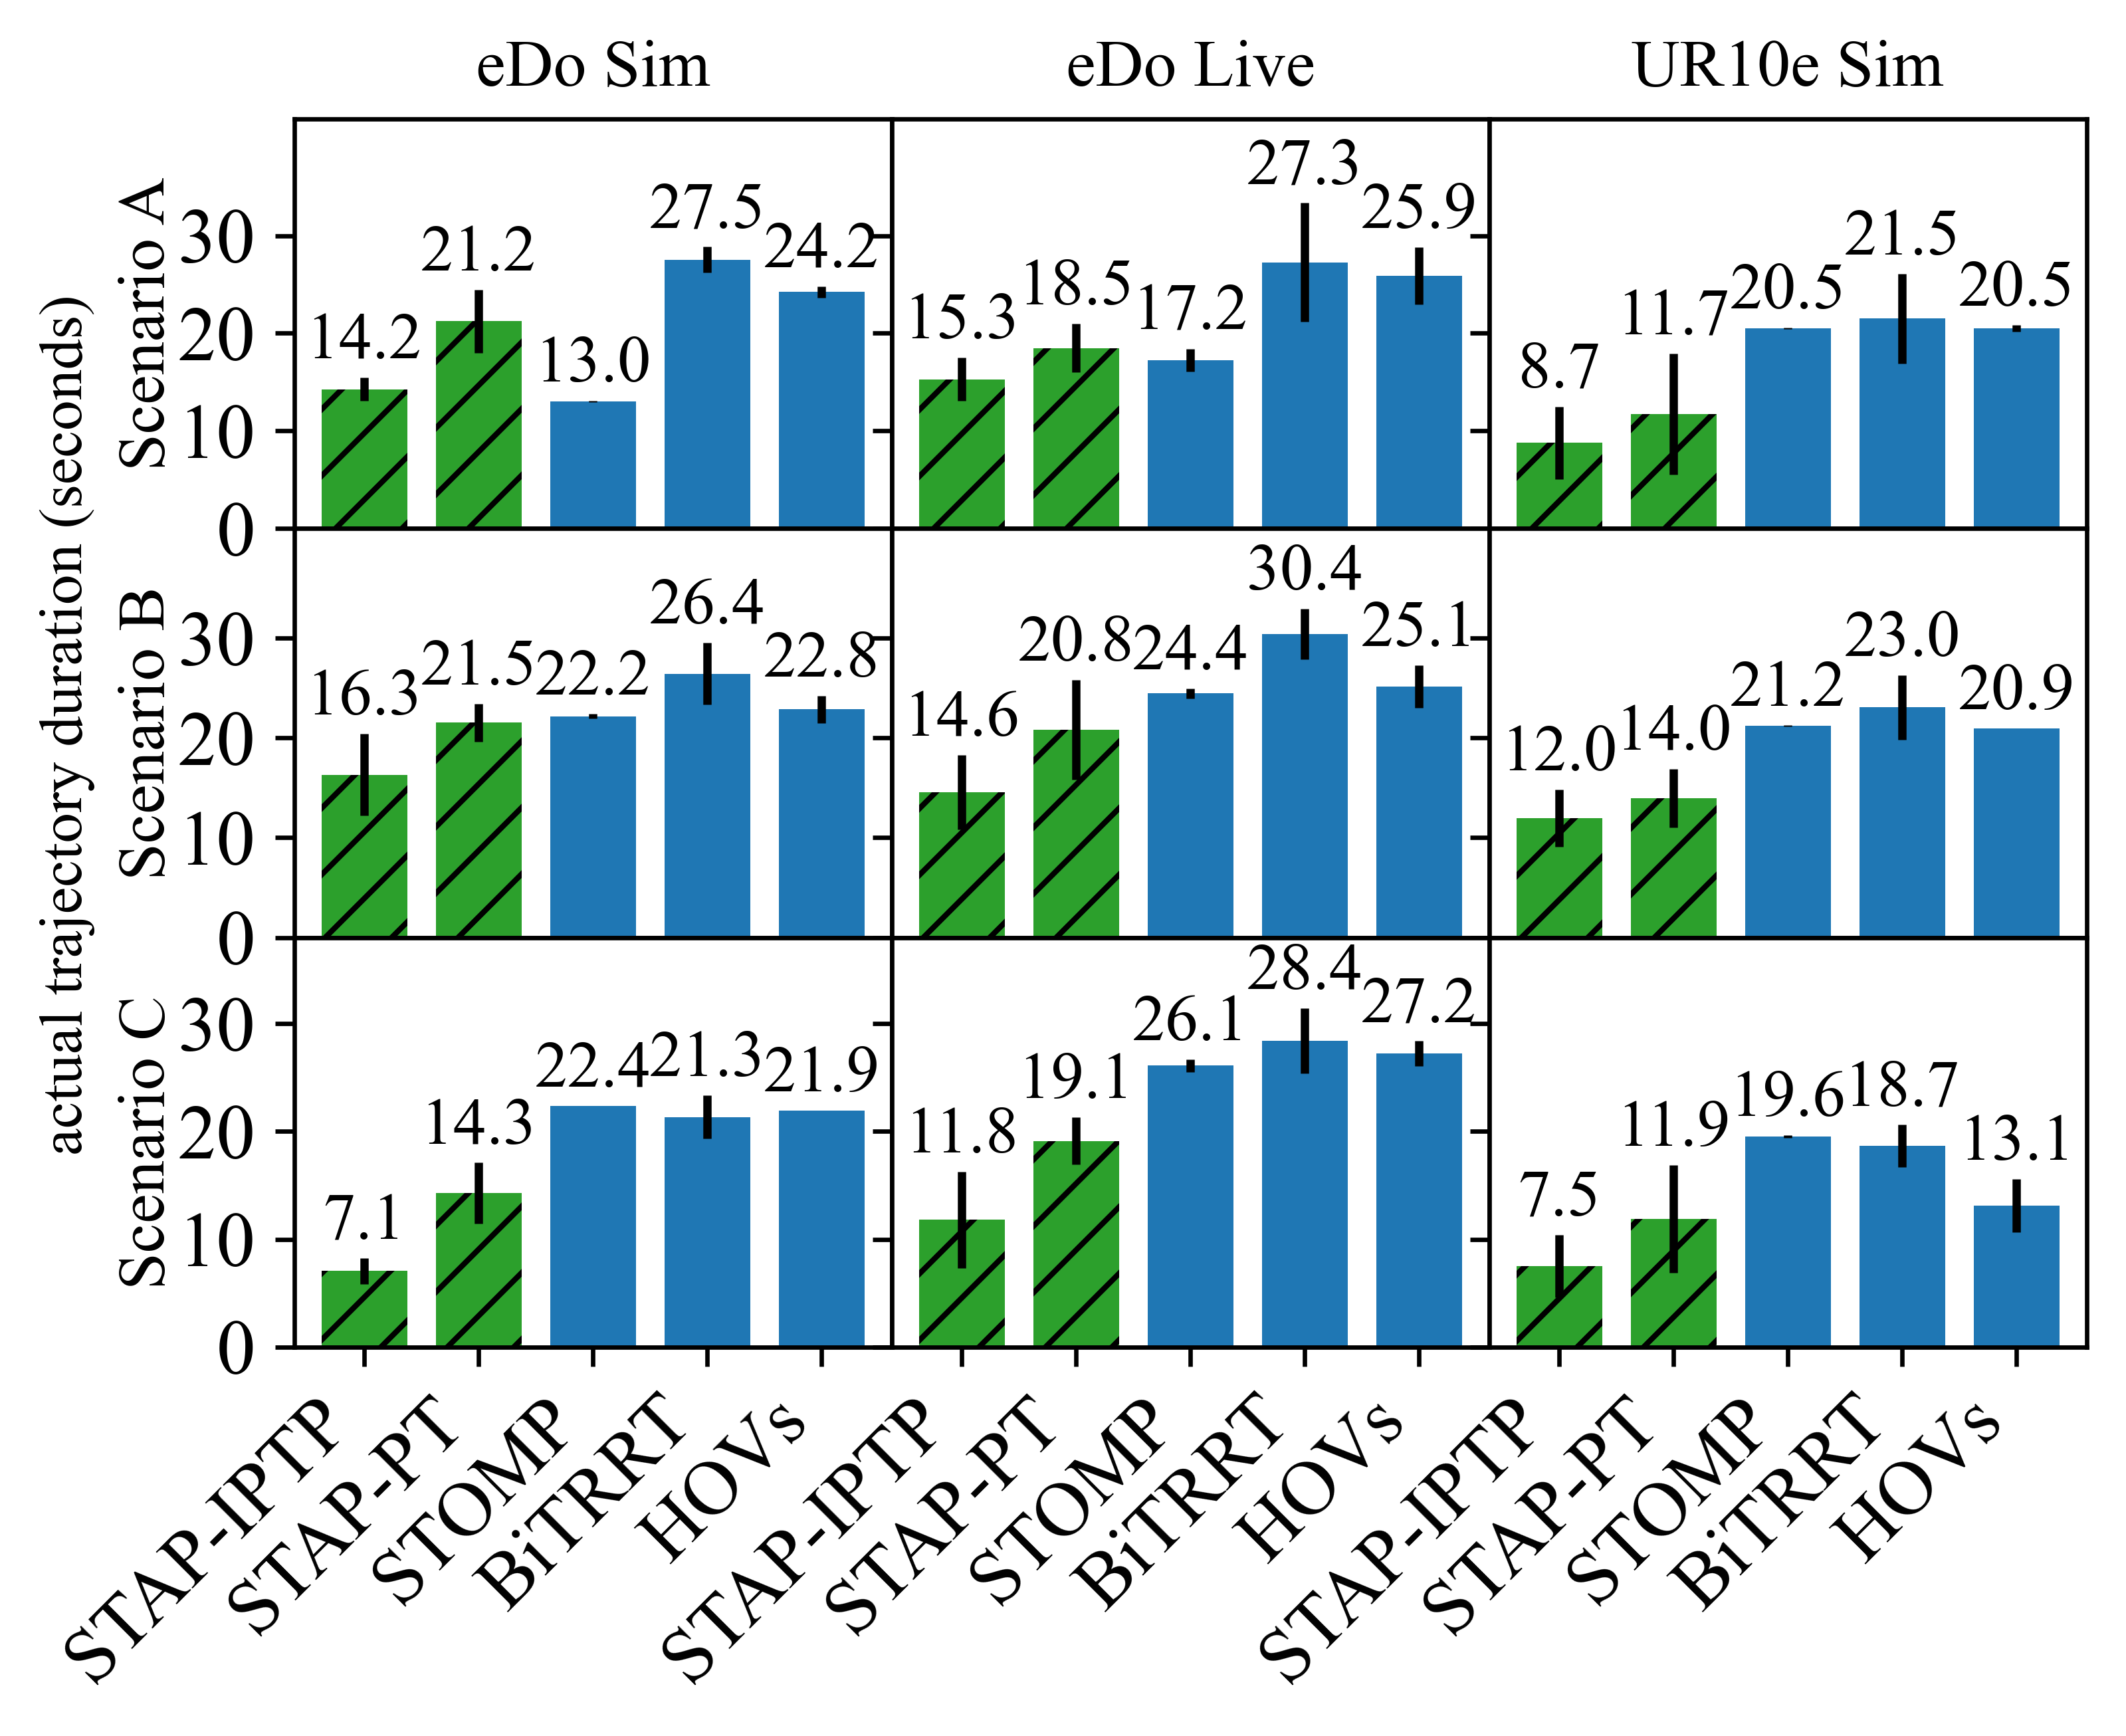

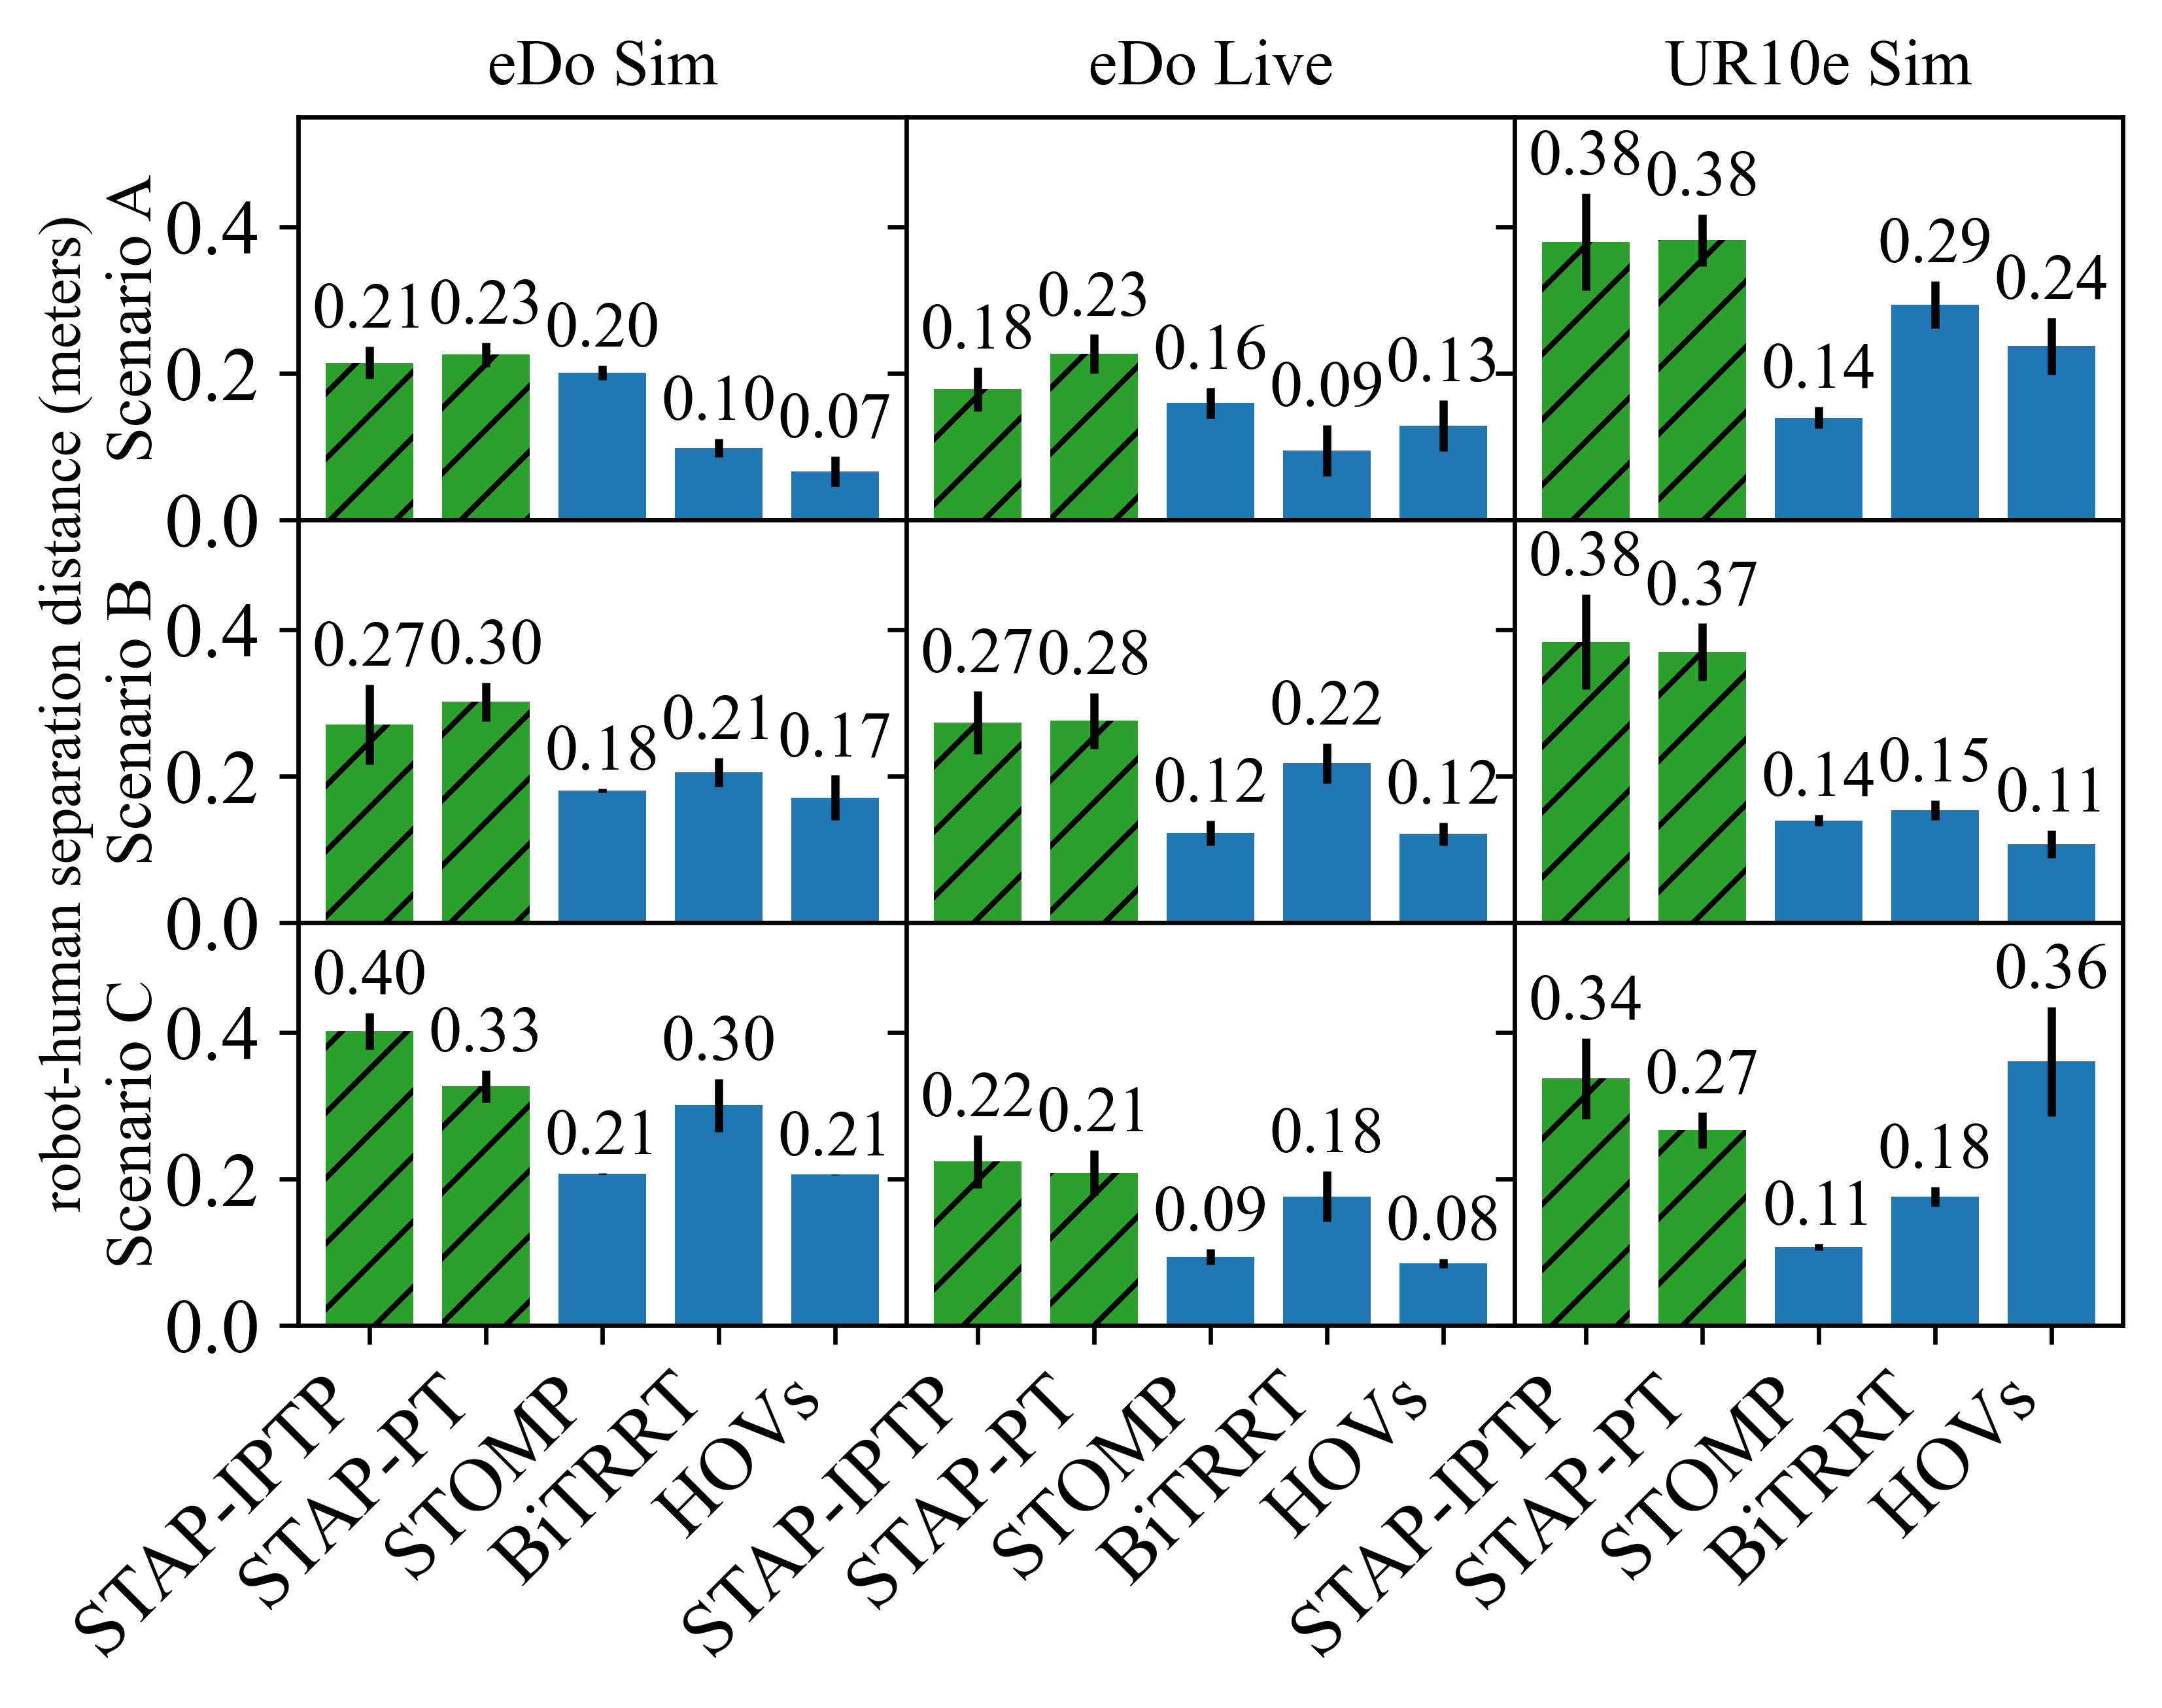

samples:100
optimal:5.3004325
180
6.09817


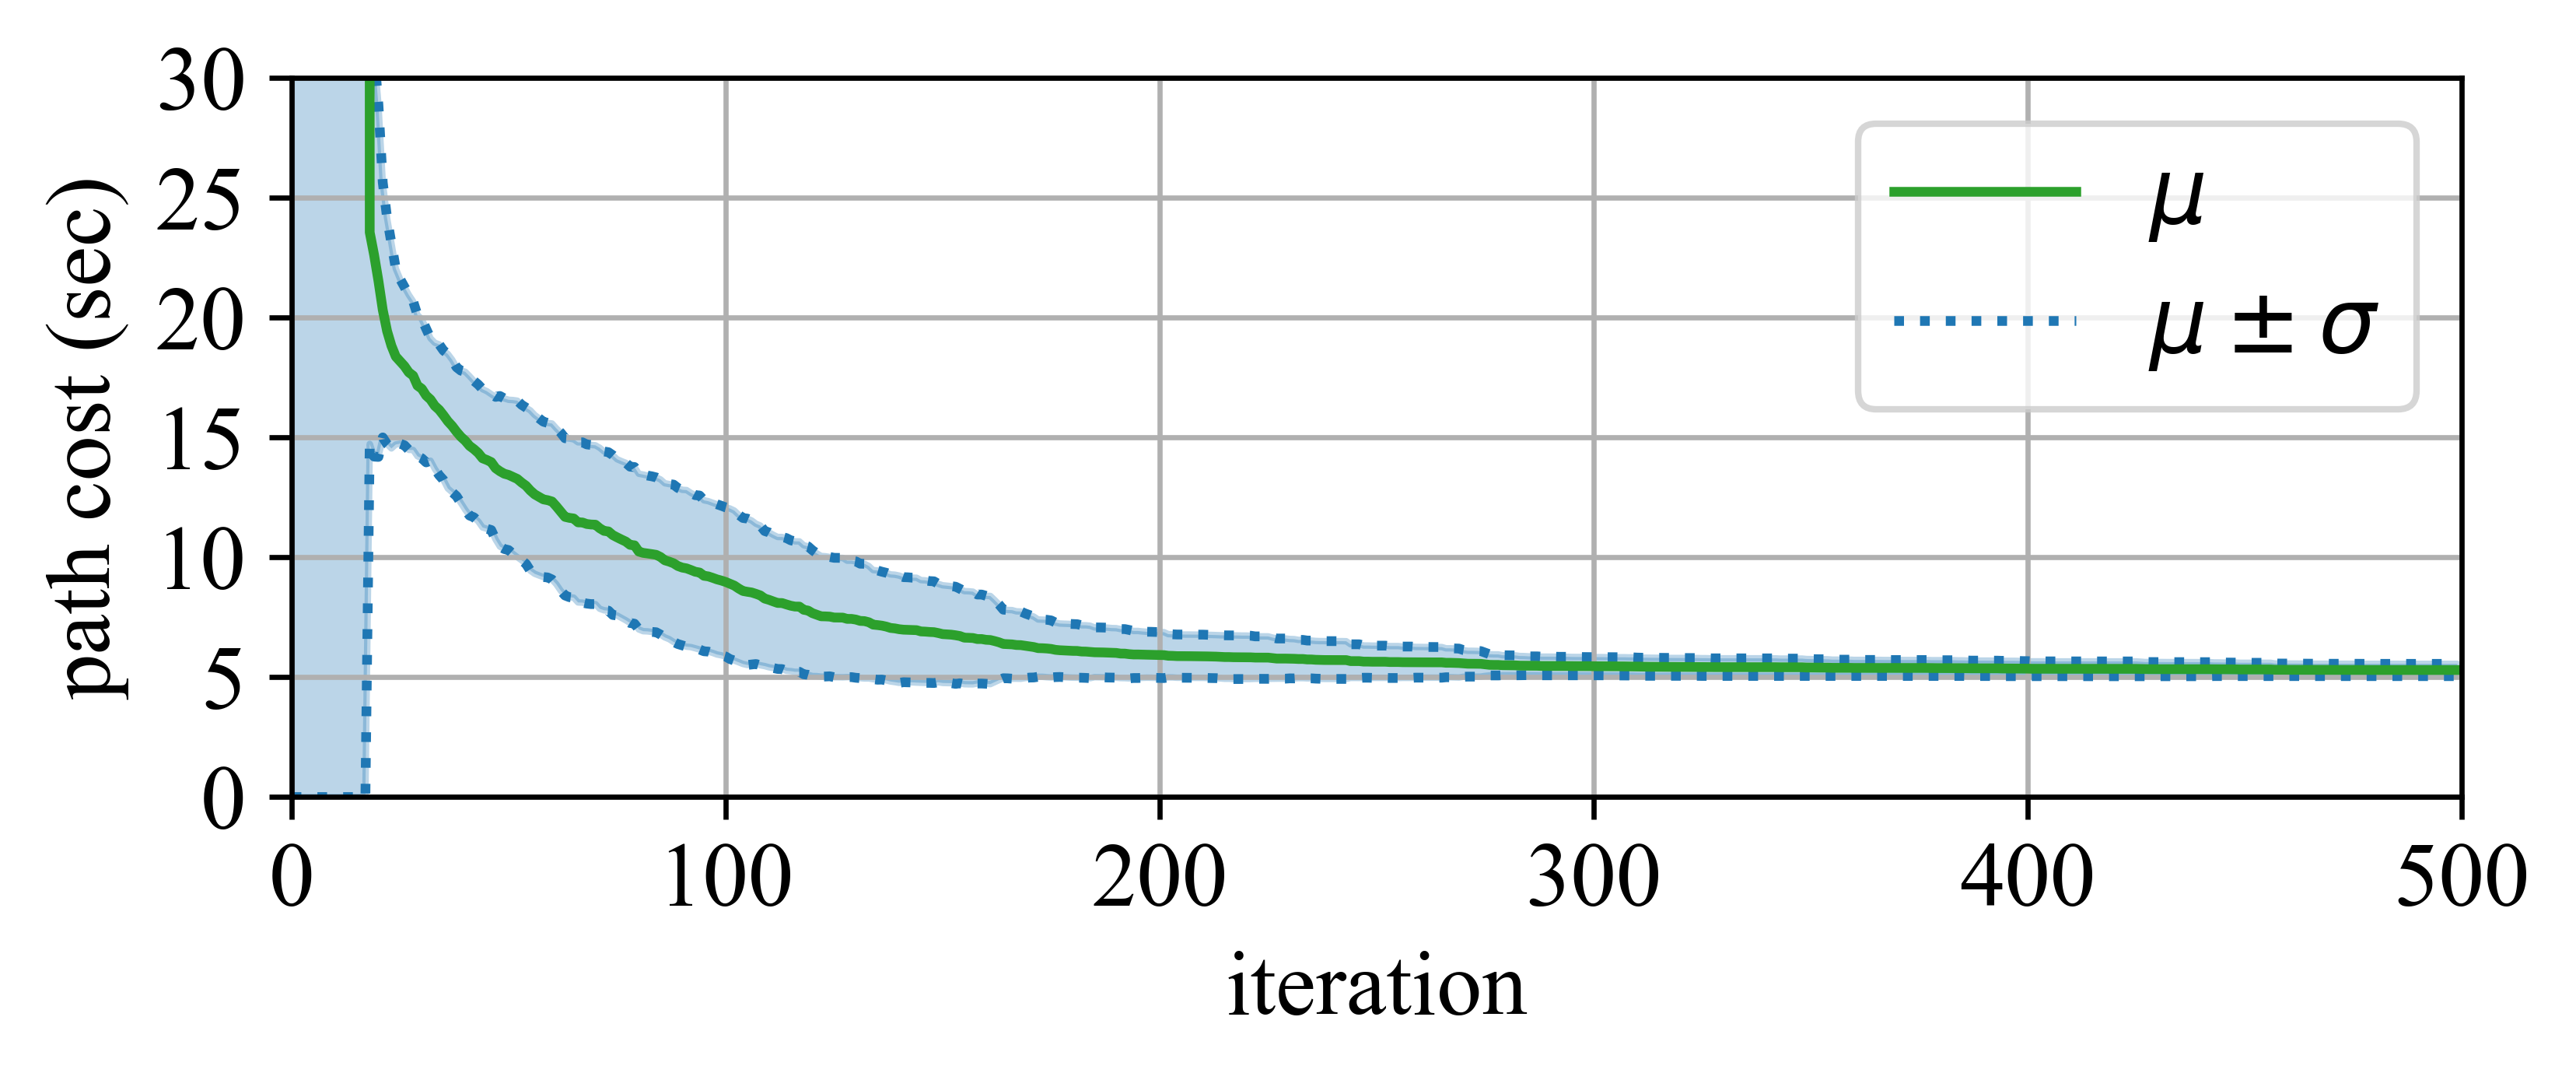

In [3]:

import csv
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 600
font = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 14}

mpl.rc('font', **font)
fsize=12

edo_task1_sim_plot_tests = ['edo_avoid_task1_sim','edo_avoid2_task1_sim','edo_stomp_task1_sim','edo_birrt_replan_task1_1_sim','edo_prob_hamp_task1_sim']
edo_task3_sim_plot_tests = ['edo_avoid_task3_sim','edo_avoid2_task3_sim','edo_stomp_task3_sim','edo_birrt_replan_task3_1_sim','edo_prob_hamp_task3_sim']
edo_gator_sim_plot_tests = ['edo_avoid_gator_chomp_sim','edo_avoid2_gator_chomp_sim','edo_stomp_gator_chomp_sim','edo_birrt_replan_gator_chomp_sim','edo_prob_hamp_gator_chomp_sim']
    
edo_task3_live_plot_tests = ['edo_avoid_task3_live','edo_avoid2_task3_live','edo_stomp_task3_live','edo_birrt_replan_task3_live','edo_prob_hamp_task3_live']
edo_task1_live_plot_tests = ['edo_avoid_task1_live','edo_avoid2_task1_live','edo_stomp_task1_live','edo_birrt_replan_task1_live','edo_prob_hamp_task1_live']
edo_gator_live_plot_tests = ['edo_avoid_gator_chomp_live','edo_avoid2_gator_chomp_live','edo_stomp_gator_chomp_live','edo_birrt_replan_gator_chomp_live','edo_prob_hamp_gator_chomp_live']

sharework_task1_sim_plot_tests = ['sharework_avoid_task1_sim','sharework_avoid2_task1_sim','sharework_stomp_task1_sim','sharework_birrt_replan_task1_1_sim','sharework_prob_hamp_task1_sim']
sharework_task3_sim_plot_tests = ['sharework_avoid_task3_sim','sharework_avoid2_task3_sim','sharework_stomp_task3_sim','sharework_birrt_replan_task3_1_sim','sharework_prob_hamp_task3_sim']
sharework_gator_sim_plot_tests = ['sharework_avoid_gator_chomp_sim','sharework_avoid2_gator_chomp_sim','sharework_stomp_gator_chomp_sim','sharework_birrt_replan_gator_chomp_1_sim','sharework_prob_hamp_gator_chomp_sim']


fig1, ax1= plt.subplots(3,3,sharey='row',sharex=True,figsize=(5.8, 4))
plot_data = []
means = []
std_devs = []
for i in range(5):
    test = edo_task1_sim_plot_tests[i]
    plot_data.append(final_times_arr[test])
    means.append(np.mean(final_times_arr[test]))
    std_devs.append(np.std(final_times_arr[test]))
whiskerprops = dict(linestyle='-',linewidth=1.4, color='black')
boxprops = dict(linewidth=1.4)
meanlineprops = dict(marker='D', markeredgecolor='black',
                      markerfacecolor='firebrick')
medianprops = dict(linestyle='-', linewidth=2.0, color='tab:blue')
width = 1.5
colors = ['tab:green','tab:green','tab:blue','tab:blue','tab:blue']
hatch = [ "//" , "//" , "","",""]
rects0 = ax1[0,0].bar(np.arange(5)+1,means,width/2,yerr=std_devs,color=colors,hatch=hatch)
ax1[0,0].bar_label(rects0, padding=1,fmt='%.1f',fontsize=fsize)

plot_data = []
means = []
std_devs = []
for i in range(5):
    test = edo_task1_live_plot_tests[i]
    plot_data.append(final_times_arr[test])
    means.append(np.mean(final_times_arr[test]))
    std_devs.append(np.std(final_times_arr[test]))

rects1 = ax1[0,1].bar(np.arange(5)+1,means,width/2,yerr=std_devs,color=colors,hatch=hatch)
ax1[0,1].bar_label(rects1, padding=1,fmt='%.1f',fontsize=fsize)

plot_data = []
means = []
std_devs = []
for i in range(5):
    test = sharework_task1_sim_plot_tests[i]
    plot_data.append(final_times_arr[test])
    means.append(np.mean(final_times_arr[test]))
    std_devs.append(np.std(final_times_arr[test]))

rects2 = ax1[0,2].bar(np.arange(5)+1,means,width/2,yerr=std_devs,color=colors,hatch=hatch)
ax1[0,2].bar_label(rects2, padding=1,fmt='%.1f',fontsize=fsize)
ax1[0,0].set_ylabel('Scenario A', labelpad=0,fontsize=12)
plot_data = []
means = []
std_devs = []
for i in range(5):
    test = edo_task3_sim_plot_tests[i]
    plot_data.append(final_times_arr[test])
    means.append(np.mean(final_times_arr[test]))
    std_devs.append(np.std(final_times_arr[test]))

rects3 = ax1[1,0].bar(np.arange(5)+1,means,width/2,yerr=std_devs,color=colors,hatch=hatch)
ax1[1,0].bar_label(rects3, padding=1,fmt='%.1f',fontsize=fsize)
    
plot_data = []
means = []
std_devs = []
for i in range(5):
    test = edo_task3_live_plot_tests[i]
    plot_data.append(final_times_arr[test])
    means.append(np.mean(final_times_arr[test]))
    std_devs.append(np.std(final_times_arr[test]))

rects4 = ax1[1,1].bar(np.arange(5)+1,means,width/2,yerr=std_devs,color=colors,hatch=hatch)
ax1[1,1].bar_label(rects4, padding=1,fmt='%.1f',fontsize=fsize)
    
plot_data = []
means = []
std_devs = []
for i in range(5):
    test = sharework_task3_sim_plot_tests[i]
    plot_data.append(final_times_arr[test])
    means.append(np.mean(final_times_arr[test]))
    std_devs.append(np.std(final_times_arr[test]))

rects5 = ax1[1,2].bar(np.arange(5)+1,means,width/2,yerr=std_devs,color=colors,hatch=hatch)
ax1[1,2].bar_label(rects5, padding=1,fmt='%.1f',fontsize=fsize)
    
ax1[1,0].set_ylabel('Scenario B', labelpad=0,fontsize=12)    

plot_data = []
means = []
std_devs = []
for i in range(5):
    test = edo_gator_sim_plot_tests[i]
    plot_data.append(final_times_arr[test])
    means.append(np.mean(final_times_arr[test]))
    std_devs.append(np.std(final_times_arr[test]))

rects6 = ax1[2,0].bar(np.arange(5)+1,means,width/2,yerr=std_devs,color=colors,hatch=hatch)
ax1[2,0].bar_label(rects6, padding=1,fmt='%.1f',fontsize=fsize)
    
plot_data = []
means = []
std_devs = []
for i in range(5):
    test = edo_gator_live_plot_tests[i]
    plot_data.append(final_times_arr[test])
    means.append(np.mean(final_times_arr[test]))
    std_devs.append(np.std(final_times_arr[test]))

rects7 = ax1[2,1].bar(np.arange(5)+1,means,width/2,yerr=std_devs,color=colors,hatch=hatch)
ax1[2,1].bar_label(rects7, padding=1,fmt='%.1f',fontsize=fsize)
    
plot_data = []
means = []
std_devs = []
for i in range(5):
    test = sharework_gator_sim_plot_tests[i]
    plot_data.append(final_times_arr[test])
    means.append(np.mean(final_times_arr[test]))
    std_devs.append(np.std(final_times_arr[test]))

rects8 = ax1[2,2].bar(np.arange(5)+1,means,width/2,yerr=std_devs,color=colors,hatch=hatch)
ax1[2,2].bar_label(rects8, padding=1,fmt='%.1f',fontsize=fsize)
    
ax1[2,0].set_ylabel('Scenario C', labelpad=0,fontsize=12) 
ax1[0,0].set_yticks([0,10,20,30])
ax1[1,0].set_yticks([0,10,20,30])
ax1[2,0].set_yticks([0,10,20,30])


fig1.text(0.015, 0.5, 'actual trajectory duration (seconds)', va='center', rotation='vertical',fontsize=11)
ax1[0,0].set_title('eDo Sim',fontsize=12)
ax1[0,1].set_title('eDo Live',fontsize=12)
ax1[0,2].set_title('UR10e Sim',fontsize=12)
ax1[0,0].set_ylim([0,42])
ax1[1,0].set_ylim([0,41])
ax1[2,0].set_ylim([0,38])

test_name = ['STAP-IPTP','STAP-PT','STOMP','BiTRRT','HOVs']
ax1[2,0].set_xticks(range(1,6),test_name,rotation=45, ha='right')
ax1[2,1].set_xticks(range(1,6),test_name,rotation=45, ha='right')
ax1[2,2].set_xticks(range(1,6),test_name,rotation=45, ha='right')
plt.subplots_adjust(wspace=0, hspace=0.0)
plt.show()

import matplotlib.pyplot as plt
edo_task1_sim_plot_tests = ['edo_avoid_task1_sim','edo_avoid2_task1_sim','edo_stomp_task1_sim','edo_birrt_replan_task1_1_sim','edo_prob_hamp_task1_sim']
edo_task3_sim_plot_tests = ['edo_avoid_task3_sim','edo_avoid2_task3_sim','edo_stomp_task3_sim','edo_birrt_replan_task3_1_sim','edo_prob_hamp_task3_sim']
edo_gator_sim_plot_tests = ['edo_avoid_gator_chomp_sim','edo_avoid2_gator_chomp_sim','edo_stomp_gator_chomp_sim','edo_birrt_replan_gator_chomp_sim','edo_prob_hamp_gator_chomp_sim']
    
edo_task3_live_plot_tests = ['edo_avoid_task3_live','edo_avoid2_task3_live','edo_stomp_task3_live','edo_birrt_replan_task3_live','edo_prob_hamp_task3_live']
edo_task1_live_plot_tests = ['edo_avoid_task1_live','edo_avoid2_task1_live','edo_stomp_task1_live','edo_birrt_replan_task1_live','edo_prob_hamp_task1_live']
edo_gator_live_plot_tests = ['edo_avoid_gator_chomp_live','edo_avoid2_gator_chomp_live','edo_stomp_gator_chomp_live','edo_birrt_replan_gator_chomp_live','edo_prob_hamp_gator_chomp_live']

sharework_task1_sim_plot_tests = ['sharework_avoid_task1_sim','sharework_avoid2_task1_sim','sharework_stomp_task1_sim','sharework_birrt_replan_task1_1_sim','sharework_prob_hamp_task1_sim']
sharework_task3_sim_plot_tests = ['sharework_avoid_task3_sim','sharework_avoid2_task3_sim','sharework_stomp_task3_sim','sharework_birrt_replan_task3_1_sim','sharework_prob_hamp_task3_sim']
sharework_gator_sim_plot_tests = ['sharework_avoid_gator_chomp_sim','sharework_avoid2_gator_chomp_sim','sharework_stomp_gator_chomp_sim','sharework_birrt_replan_gator_chomp_1_sim','sharework_prob_hamp_gator_chomp_sim']

fig1, ax1= plt.subplots(3,3,sharey='row',sharex=True,figsize=(6, 4))
plot_data = []
means = []
std_devs = []
for i in range(5):
    test = edo_task1_sim_plot_tests[i]
    plot_data.append(separation_dists[test])
    means.append(np.mean(separation_dists[test]))
    std_devs.append(np.std(separation_dists[test]))
whiskerprops = dict(linestyle='-',linewidth=1.4, color='black')
boxprops = dict(linewidth=1.4)
meanlineprops = dict(marker='D', markeredgecolor='black',
                      markerfacecolor='firebrick')
medianprops = dict(linestyle='-', linewidth=2.0, color='tab:blue')
width = 1.5
colors = ['tab:green','tab:green','tab:blue','tab:blue','tab:blue']
hatch = [ "//" , "//" , "","",""]
rects0 = ax1[0,0].bar(np.arange(5)+1,means,width/2,yerr=std_devs,color=colors,hatch=hatch)
ax1[0,0].bar_label(rects0, padding=1,fmt='%.2f',fontsize=fsize)

# pos = np.arange(5) + 1
# heights = [0.4,0.65,0.7,0.5,0.7]
# for tick in range(5):
#     ax[0,0].text(pos[tick], heights[tick], '{:.1f}'.format(means[tick]),
#              transform=ax[0,0].get_xaxis_transform(),
#              horizontalalignment='center')
plot_data = []
means = []
std_devs = []
for i in range(5):
    test = edo_task1_live_plot_tests[i]
    plot_data.append(separation_dists[test])
    means.append(np.mean(separation_dists[test]))
    std_devs.append(np.std(separation_dists[test]))

rects1 = ax1[0,1].bar(np.arange(5)+1,means,width/2,yerr=std_devs,color=colors,hatch=hatch)
ax1[0,1].bar_label(rects1, padding=1,fmt='%.2f',fontsize=fsize)

plot_data = []
means = []
std_devs = []
for i in range(5):
    test = sharework_task1_sim_plot_tests[i]
    plot_data.append(separation_dists[test])
    means.append(np.mean(separation_dists[test]))
    std_devs.append(np.std(separation_dists[test]))

rects2 = ax1[0,2].bar(np.arange(5)+1,means,width/2,yerr=std_devs,color=colors,hatch=hatch)
ax1[0,2].bar_label(rects2, padding=1,fmt='%.2f',fontsize=fsize)

ax1[0,0].set_ylabel('Scenario A', labelpad=0,fontsize=12)
plot_data = []
means = []
std_devs = []
for i in range(5):
    test = edo_task3_sim_plot_tests[i]
    plot_data.append(separation_dists[test])
    means.append(np.mean(separation_dists[test]))
    std_devs.append(np.std(separation_dists[test]))

rects3 = ax1[1,0].bar(np.arange(5)+1,means,width/2,yerr=std_devs,color=colors,hatch=hatch)
ax1[1,0].bar_label(rects3, padding=1,fmt='%.2f',fontsize=fsize)
    
plot_data = []
means = []
std_devs = []
for i in range(5):
    test = edo_task3_live_plot_tests[i]
    plot_data.append(separation_dists[test])
    means.append(np.mean(separation_dists[test]))
    std_devs.append(np.std(separation_dists[test]))

rects4 = ax1[1,1].bar(np.arange(5)+1,means,width/2,yerr=std_devs,color=colors,hatch=hatch)
ax1[1,1].bar_label(rects4, padding=1,fmt='%.2f',fontsize=fsize)
    
plot_data = []
means = []
std_devs = []
for i in range(5):
    test = sharework_task3_sim_plot_tests[i]
    plot_data.append(separation_dists[test])
    means.append(np.mean(separation_dists[test]))
    std_devs.append(np.std(separation_dists[test]))

rects5 = ax1[1,2].bar(np.arange(5)+1,means,width/2,yerr=std_devs,color=colors,hatch=hatch)
ax1[1,2].bar_label(rects5, padding=1,fmt='%.2f',fontsize=fsize)
    
ax1[1,0].set_ylabel('Scenario B', labelpad=0,fontsize=12)    
# pos = np.arange(5) + 1
# heights = [0.25,0.72,0.75,0.65,0.75]
# for tick, label in zip(range(5), ax2.get_xticklabels()):
#     k = tick % 2
#     ax2.text(pos[tick], heights[tick], '{:.1f}'.format(means[tick]),
#              transform=ax2.get_xaxis_transform(),
#              horizontalalignment='center', size='x-small')


plot_data = []
means = []
std_devs = []
for i in range(5):
    test = edo_gator_sim_plot_tests[i]
    plot_data.append(separation_dists[test])
    means.append(np.mean(separation_dists[test]))
    std_devs.append(np.std(separation_dists[test]))

rects6 = ax1[2,0].bar(np.arange(5)+1,means,width/2,yerr=std_devs,color=colors,hatch=hatch)
ax1[2,0].bar_label(rects6, padding=1,fmt='%.2f',fontsize=fsize)
    
plot_data = []
means = []
std_devs = []
for i in range(5):
    test = edo_gator_live_plot_tests[i]
    plot_data.append(separation_dists[test])
    means.append(np.mean(separation_dists[test]))
    std_devs.append(np.std(separation_dists[test]))

rects7 = ax1[2,1].bar(np.arange(5)+1,means,width/2,yerr=std_devs,color=colors,hatch=hatch)
ax1[2,1].bar_label(rects7, padding=1,fmt='%.2f',fontsize=fsize)
    
plot_data = []
means = []
std_devs = []
for i in range(5):
    test = sharework_gator_sim_plot_tests[i]
    plot_data.append(separation_dists[test])
    means.append(np.mean(separation_dists[test]))
    std_devs.append(np.std(separation_dists[test]))

rects8 = ax1[2,2].bar(np.arange(5)+1,means,width/2,yerr=std_devs,color=colors,hatch=hatch)
ax1[2,2].bar_label(rects8, padding=1,fmt='%.2f',fontsize=fsize)
    
ax1[2,0].set_ylabel('Scenario C', labelpad=0,fontsize=12) 
# ax[0,0].set_yticks([0,10,20,30])
# ax[1,0].set_yticks([0,10,20,30])
# ax[2,0].set_yticks([0,10,20,30])
test_name = ['STAP-IPTP','STAP-PT','STOMP','BiTRRT','HOVs']
ax1[2,0].set_xticks(range(1,6),test_name,rotation=45, ha='right')
ax1[2,1].set_xticks(range(1,6),test_name,rotation=45, ha='right')
ax1[2,2].set_xticks(range(1,6),test_name,rotation=45, ha='right')

fig1.text(0.015, 0.5, 'robot-human separation distance (meters)', va='center', rotation='vertical',fontsize=11)

ax1[0,0].set_title('eDo Sim',fontsize=12)
ax1[0,1].set_title('eDo Live',fontsize=12)
ax1[0,2].set_title('UR10e Sim',fontsize=12)
ax1[0,0].set_yticks([0,0.2,0.4],fontsize=11)
ax1[1,0].set_yticks([0,0.2,0.4],fontsize=11)
ax1[2,0].set_yticks([0,0.2,0.4],fontsize=11)
ax1[0,0].set_ylim([0,0.55])
ax1[1,0].set_ylim([0,0.55])
ax1[2,0].set_ylim([0,0.55])

# pos = np.arange(5) + 1
# heights = [0.25,0.72,0.75,0.65,0.75]
# for tick, label in zip(range(5), ax3.get_xticklabels()):
#     k = tick % 2
#     ax3.text(pos[tick], heights[tick], '{:.1f}'.format(means[tick]),
#              transform=ax3.get_xaxis_transform(),
#              horizontalalignment='center', size='x-small')
plt.subplots_adjust(wspace=0, hspace=0.0)
plt.show()

samples = np.empty((500,0))
times = np.empty((500,0))

filename = 'avoid_gator_chomp_solver_perf_sim_100_tests.csv'
with open(filename) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    prev_iter = 0
    sample = np.zeros((500,1))
    time_col = np.zeros((500,1))
    for row in csv_reader:
#         print('{}, {}'.format(test,row))
        if row[0]=='time':
            continue
        try:
            sample_iter = int(row[1])
        except:
            continue
        if sample_iter<prev_iter:
            samples = np.append(samples,sample,axis=1)
            times = np.append(times,time_col,axis=1)
            prev_iter = 0
        try:
            sample[sample_iter,0] = float(row[2])
            time_col[sample_iter,0] = float(row[0])
            prev_iter = sample_iter
        except:
            sample[sample_iter,0] = sample[prev_iter,0]
            time_col[sample_iter,0] = time_col[prev_iter,0]

print('samples:{}'.format(samples.shape[1]))
sample_means = np.mean(samples,axis=1)
print('optimal:{}'.format(sample_means[-1]))
sample_devs = np.std(samples,axis=1)
dev_up_lim = sample_means+sample_devs
dev_low_lim = np.maximum(sample_means-sample_devs,np.zeros_like(sample_means))
x_vals = range(sample_means.shape[0])
low_lim = (sample_means-sample_devs)>0
start_idx = 0
for i in range(1,low_lim.shape[0]):
    if (not low_lim[i-1]) and low_lim[i]:
        start_idx = i
        break
        
dev_low_lim[:start_idx] = 0.0

fig, ax1 = plt.subplots(1, 1,sharex=True,figsize=(6, 2.))
ax1.plot(x_vals,dev_up_lim,color='tab:blue',linestyle='dotted',label=r'$\mu\pm\sigma$')
ax1.plot(x_vals,dev_low_lim,color='tab:blue',linestyle='dotted')
ax1.fill_between(x_vals, dev_low_lim,dev_up_lim,alpha=0.3,color='tab:blue')
ax1.plot(x_vals,sample_means,color='tab:green',label=r'$\mu$')
ax1.set_ylim([0,30])
ax1.set_xlim([0,500])
ax1.set_yticks([0,5,10,15,20,25,30])
ax1.set_ylabel('path cost (sec)')
# ax1.set_xlabel('iteration')
handles, labels = ax1.get_legend_handles_labels()
ax1.legend([handles[1],handles[0]],[labels[1],labels[0]])

t_means = np.mean(times,axis=1)
idx = np.argmin(np.abs(t_means-30))
print(idx)
print(sample_means[idx])
t_devs = np.std(times,axis=1)
dev_up_lim = t_means+t_devs
dev_low_lim = np.maximum(t_means-t_devs,np.zeros_like(t_means))

# # fig2, ax2 = plt.subplots(1, 1,figsize=(8, 3))
# ax2.plot(x_vals,dev_up_lim,color='tab:blue',linestyle='dotted',label=r'$\mu\pm\sigma$')
# ax2.plot(x_vals,dev_low_lim,color='tab:blue',linestyle='dotted')
# ax2.fill_between(x_vals, dev_low_lim,dev_up_lim,alpha=0.3,color='tab:blue')
# ax2.plot(x_vals,t_means,color='tab:green',label=r'$\mu$')
# ax2.set_ylim([0,240])
# ax2.set_xlim([0,500])
# ax2.set_yticks([0,50,100,150,200])
# ax2.set_ylabel('planning time (sec)')
# ax2.set_xlabel('iteration')
# handles, labels = ax2.get_legend_handles_labels()
# ax2.legend([handles[1],handles[0]],[labels[1],labels[0]])
ax1.set_xlabel('iteration')
ax1.grid()
# ax2.grid()
# plt.subplots_adjust(wspace=0, hspace=0.05)
plt.show()